<a href="https://colab.research.google.com/github/0422alsrud/Timeseries-classification/blob/main/4_2___MIN2Net_MI_EEG_SMRBCI_dependent_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation

In [ ]:
!wget https://www.python.org/ftp/python/3.6.9/Python-3.6.9.tgz
!tar xvfz Python-3.6.9.tgz
!Python-3.6.9/configure
!make
!sudo make install

# !pip install Python==3.6.9
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!which python
!python --version

#구글 코랩에 디폴트로 깔려 있는 python 3.6과 매칭이 되는 미니콘다를 깔아야 함
#그 미니콘다 버전은 4.5.4
!echo $PYTHONPATH




스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Compiling '/usr/local/lib/python3.6/site-packages/scipy/linalg/_decomp_ldl.py'...
Compiling '/usr/local/lib/python3.6/site-packages/scipy/linalg/_decomp_polar.py'...
Compiling '/usr/local/lib/python3.6/site-packages/scipy/linalg/_decomp_qz.py'...
Compiling '/usr/local/lib/python3.6/site-packages/scipy/linalg/_expm_frechet.py'...
Compiling '/usr/local/lib/python3.6/site-packages/scipy/linalg/_generate_pyx.py'...
Compiling '/usr/local/lib/python3.6/site-packages/scipy/linalg/_interpolative_backend.py'...
Compiling '/usr/local/lib/python3.6/site-packages/scipy/linalg/_matfuncs_inv_ssq.py'...
Compiling '/usr/local/lib/python3.6/site-packages/scipy/linalg/_matfuncs_sqrtm.py'...
Compiling '/usr/local/lib/python3.6/site-packages/scipy/linalg/_procrustes.py'...
Compiling '/usr/local/lib/python3.6/site-packages/scipy/linalg/_sketches.py'...
Compiling '/usr/local/lib/python3.6/site-packages/scipy/linalg/_solvers.py'...
Compiling '/usr/local/lib/python3.6/site-

In [ ]:
%%bash

MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2022-12-13 13:02:51--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2022-12-13 13:02:51--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh.1’

     0K .......... .......... .......... .......... ..........  0% 4.74M 12s
    50K .......... .......... .......... .......... .......... 

In [ ]:
!which conda
!conda --version
!which python 
#미니 콘다가 설치된 후에는 파이썬 버젼이 살짝 바뀜
!python --version


/usr/local/bin/conda
conda 4.5.4
/usr/local/bin/python
Python 3.6.5 :: Anaconda, Inc.


In [ ]:
%%bash

conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    sqlite-3.38.2              |       hc218d9a_0         1.5 MB
    tk-8.6.11                  |       h1ccaba5_0         3.2 MB
    ------------------------------------------------------------
                                           Total:         4.7 MB

The following packages will be UPDATED:

    ca-certificates: 2018.03.07-0          --> 2022.10.11-h06a4308_0   
    certifi:         2018.4.16-py36_0      --> 2021.5.30-py36h06a4308_0
    cffi:            1.11.5-py36h9745a5d_0 --> 1.14.6-py36h400218f_0   
    conda:           4.5.4-py36_0          --> 4.10.3-py36h06a4308_0   
    cryptography:    2.2.2-py36h14c3975_0  --> 35.0.0-py36hd23ed53_0   
    libffi:          3.2.1-hd88cf55_4   

sqlite-3.38.2        |  1.5 MB | ########## | 100% 
tk-8.6.11            |  3.2 MB | ########## | 100% 
/usr/local/lib/python3.6/site-packages/cryptography/hazmat/backends/openssl/x509.py:18: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,

The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::python==3.6.13=h12debd9_1
  - defaults/linux-64::yaml==0.1.7=had09818_2
  - defaults/linux-64::brotlipy==0.7.0=py36h27cfd23_1003
  - defaults/linux-64::pycosat==0.6.3=py36h0a5515d_0
  - defaults/linux-64::ruamel_yaml==0.15.37=py36h14c3975_2
  - defaults/linux-64::tk==8.6.11=h1ccaba5_0
  - defaults/linux-64::chardet==3.0.4=py36h0f667ec_1
  - defaults/linux-64::conda==4.10.3=py36h06a4308_0
  - defaults/linux-64::six==1.11.0=py36h372c433_1
  - defaults/linux-64::conda-package-handling==1.7.3=py36h27c

In [ ]:
!conda --version
!python --version
import sys
sys.path
import sys
_ = (sys.path.append("/usr/local/lib/python3.6/site-packages"))
sys.path

conda 4.10.3
Python 3.6.13 :: Anaconda, Inc.


['/content',
 '/env/python',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.8/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/usr/local/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/site-packages']

In [ ]:
!wget https://raw.githubusercontent.com/IoBT-VISTEC/MIN2Net/main/environment.yml
!conda env create -f environment.yml
!conda activate min2net

--2022-12-13 13:03:42--  https://raw.githubusercontent.com/IoBT-VISTEC/MIN2Net/main/environment.yml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 265 [text/plain]
Saving to: ‘environment.yml.1’

environment.yml.1   100%[===================>]     265  --.-KB/s    in 0s      

2022-12-13 13:03:42 (13.0 MB/s) - ‘environment.yml.1’ saved [265/265]


CondaValueError: prefix already exists: /usr/local/envs/min2net


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart yo

In [ ]:
! pip install min2net
! wget https://github.com/IoBT-VISTEC/MIN2Net/releases/download/v1.0.1/min2net-1.0.1-py3-none-any.whl
! pip install min2net-1.0.1-py3-none-any.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.6/site-packages/cryptography/hazmat/backends/openssl/x509.py:18: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,
    100% |████████████████████████████████| 962kB 15.8MB/s 
tqdm 4.63.0 requires importlib-resources; python_version < "3.7", which is not installed.
conda 4.10.3 requires ruamel_yaml_conda>=0.11.14, which is not installed.
  Found existing installation: setuptools 40.6.2
    Uninstalling setuptools-40.6.2:
      Successfully uninstalled setuptools-40.6.2
  Found existing installation: wheel 0.31.1
    Uninstalling wheel-0.31.1:
      Successfully uninstalled wheel-0.31.1
--2022-12-13 13:03:45--  https://github.com/IoBT-VISTEC/MIN2Net/releases/download/v1.0.1/min2net-1.0.1-py3-none-any.whl
Resolving github.com (github.com)... 20.201.28.151
Connecting 

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
!cd drive/MyDrive/Term

import numpy as np
import csv
from scipy import signal
from scipy.signal import butter, filtfilt
import wget
import os
import time
import tensorflow as tf
from sklearn.utils import class_weight
from scipy.interpolate import CubicSpline 
from scipy import ndimage
import argparse
PATH = os.getcwd()

print(PATH)

folder_name = str(PATH)+'/datasets'
print(folder_name)

Mounted at /content/drive
/content
/content/datasets


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
!cd drive/MyDrive/Term

Mounted at /content/drive


In [ ]:
import numpy as np
import csv
from scipy import signal
from scipy.signal import butter, filtfilt
import wget
import os
import time
import tensorflow as tf
from sklearn.utils import class_weight
from scipy.interpolate import CubicSpline 
from scipy import ndimage
import argparse
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
# !cd drive/MyDrive/Term
PATH= '/content/drive/MyDrive/Term'
# PATH = os.getcwd()
print(PATH)

folder_name = str(PATH)+'/datasets'
print(folder_name)

Mounted at /content/drive
/content/drive/MyDrive/Term
/content/drive/MyDrive/Term/datasets


In [ ]:
import numpy as np
import csv
from scipy import signal
from scipy.signal import butter, filtfilt
import wget
import os
import time
import tensorflow as tf
from sklearn.utils import class_weight
from scipy.interpolate import CubicSpline 
from scipy import ndimage
import argparse
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
# !cd drive/MyDrive/Term
PATH= '/content/drive/MyDrive/Term'
# PATH = os.getcwd()
print(PATH)

folder_name = str(PATH)+'/datasets'
print(folder_name)
# lib path
# PATH = os.path.dirname(os.path.realpath(__file__))

# def load_raw(dataset):
  
#     PATH= '/content/drive/MyDrive/Term'
#     folder_name = str(PATH)+'/datasets'
#     # folder_name = 'datasets'
#     if dataset == 'OpenBMI':
#         try:
#             num_subjects = 54
#             sessions = [1, 2]
#             save_path = folder_name + '/' + dataset + '/raw'
#             if save_path is not None:
#                 if not os.path.exists(save_path):
#                     os.makedirs(save_path)
#             for session in sessions:
#                 for person in range(1, num_subjects+1):
#                     file_name = '/sess{:02d}_subj{:02d}_EEG_MI.mat'.format(session,person)
#                     if os.path.exists(save_path+file_name):
#                         os.remove(save_path+file_name) # if exist, remove file
#                     print('\n===Download is being processed on session: {} subject: {}==='.format(session, person))
#                     url = 'ftp://parrot.genomics.cn/gigadb/pub/10.5524/100001_101000/100542/session{}/s{}{}'.format(session, person, file_name)
#                     print('save to: '+save_path+file_name)
#                     wget.download(url,  save_path+file_name)
#             print('\nDone!')
#         except:
#             raise Exception('Path Error: file does not exist, please direccly download at http://gigadb.org/dataset/100542')
#     elif dataset == 'BCIC2a':
#         try:
#             num_subjects = 9
#             sessions = ['T', 'E']
#             save_path = folder_name + '/' + dataset + '/raw'
#             if save_path is not None:
#                 if not os.path.exists(save_path):
#                     os.makedirs(save_path)

#             for session in sessions:
#                 for person in range(1, num_subjects+1):
#                     file_name = '/A{:02d}{}.mat'.format(person, session)
#                     if os.path.exists(save_path+file_name):
#                         os.remove(save_path+file_name) # if exist, remove file
#                     print('\n===Download is being processed on session: {} subject: {}==='.format(session, person))
#                     url = 'https://lampx.tugraz.at/~bci/database/001-2014'+file_name
#                     print('save to: '+save_path+file_name)
#                     wget.download(url, save_path+file_name)
#             print('\nDone!')
#         except:
#             raise Exception('Path Error: file does not exist, please direccly download at http://bnci-horizon-2020.eu/database/data-sets')
#     elif dataset == 'SMR_BCI':
#         try:
#             num_subjects = 14
#             sessions = ['T', 'E']
#             save_path = folder_name + '/' + dataset + '/raw'
#             print(save_path)
#             if save_path is not None:
#                 if not os.path.exists(save_path):
#                     os.makedirs(save_path)
#             for session in sessions:
#                 for person in range(1, num_subjects+1):
#                     file_name = '/S{:02d}{}.mat'.format(person, session)
#                     if os.path.exists(save_path+file_name):
#                         os.remove(save_path+file_name) # if exist, remove file
#                     print('\n===Download is being processed on session: {} subject: {}==='.format(session, person))
#                     # url = 'https://lampx.tugraz.at/~bci/database/002-2014'+file_name
#                     url='https://drive.google.com/uc?id=1AJV8otG_SWXOou3LbJTJsRaSls2AlTZH'
#                     print('save to: '+save_path+file_name)
#                     print(save_path)
#                     wget.download(url,  save_path+file_name) # 이거 느낌표 안먹힐텐데..
#                     #혹시 데이터 몇개야?
#             print('\nDone!')
#         except:
#             raise Exception('Path Error: file does not exist, please direccly download at http://bnci-horizon-2020.eu/database/data-sets')


Mounted at /content/drive
/content/drive/MyDrive/Term
/content/drive/MyDrive/Term/datasets


In [ ]:

class DataLoader:
    def __init__(self, dataset, train_type=None, data_type=None, num_class=2, subject=None, data_format=None, dataset_path='/datasets', **kwargs):

        self.dataset = dataset #Dataset name: 'OpenBMI', 'SMR_BCI', 'BCIC2a'
        self.train_type = train_type # 'subject_dependent', 'subject_independent'
        self.data_type = data_type # 'fbcsp', 'spectral_spatial', 'time_domain'
        self.dataset_path = dataset_path
        self.subject = subject # id, start at 1
        self.data_format = data_format # 'channels_first', 'channels_last'
        self.fold = None # fold, start at 1
        self.prefix_name = 'S'
        self.num_class = num_class
        for k in kwargs.keys():
            self.__setattr__(k, kwargs[k])


        self.path = self.dataset_path+'/'+self.dataset+'/'+self.data_type+'/'+str(self.num_class)+'_class/'+self.train_type
    
    def _change_data_format(self, X):
        if self.data_format == 'NCTD':
            # (#n_trial, #channels, #time, #depth)
            X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
        elif self.data_format == 'NDCT':
            # (#n_trial, #depth, #channels, #time)
            X = X.reshape(X.shape[0], 1, X.shape[1], X.shape[2])
        elif self.data_format == 'NTCD':
            # (#n_trial, #time, #channels, #depth)
            X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
            X = np.swapaxes(X, 1, 3)
        elif self.data_format == 'NSHWD':
            # (#n_trial, #Freqs, #height, #width, #depth)
            X = zero_padding(X)
            X = X.reshape(X.shape[0], X.shape[1], X.shape[2], X.shape[3], 1)
        elif self.data_format == None:
            pass
        else:
            raise Exception('Value Error: data_format requires None, \'NCTD\', \'NDCT\', \'NTCD\' or \'NSHWD\', found data_format={}'.format(self.data_format))
        print('change data_format to \'{}\', new dimention is {}'.format(self.data_format, X.shape))
        return X

    def load_train_set(self, fold, **kwargs):
        self.fold = fold
        for k in kwargs.keys():
            self.__setattr__(k, kwargs[k])
    
        # load 
        X, y =  np.array([]),  np.array([])
        try:
            self.file_x = self.path+'/X_train_{}{:03d}_fold{:03d}.npy'.format(self.prefix_name, self.subject, self.fold)
            self.file_y = self.path+'/y_train_{}{:03d}_fold{:03d}.npy'.format(self.prefix_name, self.subject, self.fold)
            X = self._change_data_format(np.load(self.file_x))
            y = np.load(self.file_y)
        except:
            raise Exception('Path Error: file does not exist, please check this path {}, and {}'.format(self.file_x, self.file_y))
        return X, y

    def load_val_set(self, fold, **kwargs):
        self.fold = fold
        for k in kwargs.keys():
            self.__setattr__(k, kwargs[k])

        # load 
        X, y =  np.array([]),  np.array([])
        try:
            self.file_x = self.path+'/X_val_{}{:03d}_fold{:03d}.npy'.format(self.prefix_name, self.subject, self.fold)
            self.file_y = self.path+'/y_val_{}{:03d}_fold{:03d}.npy'.format(self.prefix_name, self.subject, self.fold)
            X = self._change_data_format(np.load(self.file_x))
            y = np.load(self.file_y)
        except:
            raise Exception('Path Error: file does not exist, please check this path {}, and {}'.format(self.file_x, self.file_y))
        return X, y
    
    def load_test_set(self, fold, **kwargs):
        self.fold = fold
        for k in kwargs.keys():
            self.__setattr__(k, kwargs[k])

        # load 
        X, y =  np.array([]),  np.array([])
        try:
            self.file_x = self.path+'/X_test_{}{:03d}_fold{:03d}.npy'.format(self.prefix_name, self.subject, self.fold)
            self.file_y = self.path+'/y_test_{}{:03d}_fold{:03d}.npy'.format(self.prefix_name, self.subject, self.fold)
            X = self._change_data_format(np.load(self.file_x))
            y = np.load(self.file_y)
        except:
            raise Exception('Path Error: file does not exist, please check this path {}, and {}'.format(self.file_x, self.file_y))
        return X, y

def compute_class_weight(y_train):
    """compute class balancing
    Args:
        y_train (list, ndarray): [description]
    Returns:
        (dict): class weight balancing
    """
    return dict(zip(np.unique(y_train), 
                    class_weight.compute_class_weight(class_weight='balanced',
                                                      classes=np.unique(y_train),
                                                      y=y_train))) 
        
def str2bool(v):
    if isinstance(v, bool):
       return v
    if v.lower() in ('yes', 'true', 't', 'y', '1'):
        return True
    elif v.lower() in ('no', 'false', 'f', 'n', '0'):
        return False
    else:
        raise argparse.ArgumentTypeError('Boolean value expected.')

class TimeHistory(tf.keras.callbacks.Callback):
    def __init__(self, save_path=None):
        self.save_path = save_path
    def on_train_begin(self, logs={}):
        self.logs = []
        if self.save_path:
            write_log(filepath=self.save_path, data=['time_log'], mode='w')
    def on_epoch_begin(self, epoch, logs={}):
        self.start_time = time.time()
    def on_epoch_end(self, epoch, logs={}):
        time_diff = time.time()-self.start_time
        self.logs.append(time_diff)
        if self.save_path:
            write_log(filepath=self.save_path, data=[time_diff], mode='a')

def write_log(filepath='test.log', data=[], mode='w'):
    '''
    filepath: path to save
    data: list of data
    mode: a = update data to file, w = write a new file
    '''
    try:
        with open(filepath, mode) as csvFile:
            writer = csv.writer(csvFile)
            writer.writerow(data)
    except IOError:
        raise Exception('I/O error')

def zero_padding(data, pad_size=4):
    if len(data.shape) != 4:
        raise Exception('Dimension is not match!, must have 4 dims')
    new_shape = int(data.shape[2]+(2*pad_size))
    data_pad = np.zeros((data.shape[0], data.shape[1], new_shape, new_shape))
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            data_pad[i,j,:,:] = np.pad(data[i,j,:,:], [pad_size, pad_size], mode='constant')
    print(data_pad.shape)
    return data_pad 


def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

def resampling(data, new_smp_freq, data_len):
    if len(data.shape) != 3:
        raise Exception('Dimesion error', "--> please use three-dimensional input")
    new_smp_point = int(data_len*new_smp_freq)
    data_resampled = np.zeros((data.shape[0], data.shape[1], new_smp_point))
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            data_resampled[i,j,:] = signal.resample(data[i,j,:], new_smp_point)
    return data_resampled

def psd_welch(data, smp_freq):
    if len(data.shape) != 3:
        raise Exception("Dimension Error, must have 3 dimension")
    n_samples,n_chs,n_points = data.shape
    data_psd = np.zeros((n_samples,n_chs,89))
    for i in range(n_samples):
        for j in range(n_chs):
            freq, power_den = signal.welch(data[i,j], smp_freq, nperseg=n_points)
            index = np.where((freq>=8) & (freq<=30))[0].tolist()
            # print("the length of---", len(index))
            data_psd[i,j] = power_den[index]
    return data_psd
    

## Load and preprocess dada

In [ ]:
# import min2net
# import min2net.preprocessing as prep

# load_raw('SMR_BCI')
# 이건 인터넷에있는 거 다운로드해서 matlab(.mat)로 저장하는거
#.... 클래스 안에 있는거 코드만 끌어오면 이름 바꿔야 되나본데? 이해했니???설마 나한테 이거 맡겨놓고 씻으러가다거나 그런건가

# min2net.utils.load_raw('OpenBMI')


In [ ]:
# from min2net.utils import PATH

CONSTANT = {
    'BCIC2a': {
        'raw_path': 'datasets/BCIC2a/raw', # raw data path 'raw_path': 'datasets/BCIC2a'
        'n_subjs': 9,
        'n_trials': 144,
        'n_trials_per_class': 72,
        'n_chs': 20,
        'orig_smp_freq': 250,                  # Original sampling frequency (Hz)
        'trial_len': 7,                        # 7s
        'MI': {
            'start': 2,                        # start at time = 2 s
            'stop': 6,                         # stop at time = 6 s
            'len': 4,                          # 4s
        },
        'orig_chs': ['FC3', 'FC1', 'FCz', 'FC2', 'FC4',
                    'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6',
                    'CP3', 'CP1', 'CPz', 'CP2', 'CP4',
                    'P1', 'Pz', 'P2'],
        'sel_chs': ['FC3', 'FC1', 'FCz', 'FC2', 'FC4', 
                    'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6',
                    'CP3', 'CP1', 'CPz', 'CP2', 'CP4',
                    'P1', 'Pz', 'P2'] 
    },
    'SMR_BCI': {
        'raw_path': '/content/drive/MyDrive/Term/datasets/SMR_BCI/raw', # raw data path
        'n_subjs': 15,
        'n_trials_tr': 50,
        'n_trials_te': 30, 
        'n_chs': 63,
        'orig_smp_freq': 512,                   # Original sampling frequency  (Hz)
        'trial_len': 6,                         # 7s
        'MI': {
            'start': 0,                         # start at time = 4 s
            'stop': 6,                          # stop at time = 8 s
            'len': 6,                           # 4s
        },
        # 'orig_chs': ['FCC3',                   'FCCz',                 'FCC4',
        #             'C5h', 'C3', 'C3h',       'C1h', 'Cz', 'C2h',       'C4h', 'C4', 'C6h',
        #                    'CCP3',                   'CCPz',                 'CCP4'],
        'orig_chs': ['Fp1', 'Fp2', 'F7', 'FCC3', 'FCCz', 'FCC4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 
                    'C3','Cz','C4', 'T8', 'TP9', 'C5h', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'CCP3', 
                    'CCPz', 'CCP4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10', 'FC3', 'FC4', 'C5', 'C1h',
                    'C2h', 'C6h', 'C3h','CPz', 'C4h', 'P1', 'P2', 'POz', 'FT9', 'FTT9h', 'TTP7h', 
                    'TP7', 'TPP9h', 'FT10','FTT10h','TPP8h', 'TP8', 'TPP10h', 'F9', 'F10', 
                    'AF7', 'AF3', 'AF4', 'AF8', 'PO3','PO4','M'],
        'sel_chs': ['Fp1', 'Fp2', 'F7', 'FCC3', 'FCCz', 'FCC4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 
                    'C3','Cz','C4', 'T8', 'TP9', 'C5h', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'CCP3', 
                    'CCPz', 'CCP4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10', 'FC3', 'FC4', 'C5', 'C1h',
                    'C2h', 'C6h', 'C3h','CPz', 'C4h', 'P1', 'P2', 'POz', 'FT9', 'FTT9h', 'TTP7h', 
                    'TP7', 'TPP9h', 'FT10','FTT10h','TPP8h', 'TP8', 'TPP10h', 'F9', 'F10', 
                    'AF7', 'AF3', 'AF4', 'AF8', 'PO3','PO4','M']
        # 'sel_chs': [       'FCC3',                   'FCCz',                 'FCC4', 
        #             'C5h', 'C3', 'C3h',       'C1h', 'Cz', 'C2h',       'C4h','C4', 'C6h', 
        #                    'CCP3',                   'CCPz',                 'CCP4']  
    },
    'OpenBMI': {
        'raw_path': 'datasets/OpenBMI/raw', # raw data path
        'n_subjs': 54,
        'n_trials_2_class': 100,
        'n_trials_3_class': 150, 
        'n_chs': 62,
        'orig_smp_freq': 1000,                  # Original sampling frequency  (Hz)
        'trial_len': 8,                         # 8s (cut-off)
        'MI': {
            'start': 0,                         # start at time = 0 s
            'stop': 4,                          # stop at time = 0 s
            'len': 4,                           # 4s
        },
        'orig_chs': ['Fp1', 'Fp2', 'F7', 'FCC3', 'FCCz', 'FCC4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 
                    'C3','Cz','C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 
                    'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10', 'FC3', 'FC4', 'C5', 'C1',
                    'C2', 'C6', 'CP3','CPz', 'CP4', 'P1', 'P2', 'POz', 'FT9', 'FTT9h', 'TTP7h', 
                    'TP7', 'TPP9h', 'FT10','FTT10h','TPP8h', 'TP8', 'TPP10h', 'F9', 'F10', 
                    'AF7', 'AF3', 'AF4', 'AF8', 'PO3','PO4'],
        'sel_chs': ['FC5', 'FC3', 'FC1', 'FC2', 'FC4','FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 
                    'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6']  
    }

}
CONSTANT = CONSTANT['SMR_BCI']



In [ ]:
import numpy as np
import scipy.io as sio
# from min2net.utils import resampling
# from min2net.preprocessing.config import CONSTANT
# load variable form config file
orig_chs = CONSTANT['orig_chs']
orig_smp_freq = CONSTANT['orig_smp_freq']
trial_len = CONSTANT['trial_len'] 
n_chs = CONSTANT['n_chs'] # 15
window_len = CONSTANT['trial_len']*CONSTANT['orig_smp_freq'] # 8*512

def read_raw(PATH, subject , training, id_chosen_chs):
    if training:
        mat = sio.loadmat(PATH+'/P'+str(subject).zfill(2)+'T.mat')['Data']
        n_trials = CONSTANT['n_trials_tr'] # 100
        label = np.zeros(n_trials)
        data = np.zeros((n_trials, n_chs, window_len))
    else:
        mat = sio.loadmat(PATH+'/P'+str(subject).zfill(2)+'E.mat')['Data']
        n_trials = CONSTANT['n_trials_te'] # 60
        label = np.zeros(n_trials)
        data = np.zeros((n_trials, n_chs, window_len))
    NO_valid_trial = 0
    for ii in range(0,mat.size):
        mat_1 = mat[0,ii]
        mat_2 = [mat_1[0,0]]
        mat_info = mat_2[0]
        _X = mat_info[3]
        _trial = mat_info[2]
        _y = mat_info[4]
        _fs = mat_info[0]
        _classes = mat_info[1]
        # _X = mat_info[0]
        # _trial = mat_info[1]
        # _y = mat_info[2]
        # _fs = mat_info[3]
        # _classes = mat_info[4]
        for trial in range(0, _trial.size):
            # class 1 (right hand) and class 2 (feet) 
            _data = np.transpose(_X[_trial[0][trial]:int(_trial[0][trial]+window_len),id_chosen_chs])
            _label = int(_y[0][trial])
            data[NO_valid_trial,:,:] =  _data
            label[NO_valid_trial] = _label
            NO_valid_trial +=1
    return data, label-1

def chanel_selection(sel_chs): 
    chs_id = []
    for name_ch in sel_chs:
        ch_id = np.where(np.array(orig_chs) == name_ch)[0][0]
        chs_id.append(ch_id)
        print('chosen_channel:', name_ch, '---', 'Index_is:', ch_id)
    return chs_id

def load_crop_data(PATH, subject, start, stop, new_smp_freq, id_chosen_chs):
    start_time = int(start*new_smp_freq) # 4*
    stop_time = int(stop*new_smp_freq) # 8*
    X_train, y_tr = read_raw(PATH=PATH, subject=subject, training=True, id_chosen_chs=id_chosen_chs)
    X_test, y_te = read_raw(PATH=PATH, subject=subject, training=False, id_chosen_chs=id_chosen_chs)
    if new_smp_freq < orig_smp_freq:
        X_train = resampling(X_train, new_smp_freq, trial_len)
        X_test = resampling(X_test, new_smp_freq, trial_len)
    X_train = X_train[:,:,start_time:stop_time]
    X_test = X_test[:,:,start_time:stop_time]
    return X_train, y_tr, X_test, y_te  

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split 
import os
# from min2net.utils import butter_bandpass_filter
# from min2net.preprocessing.SMR_BCI import raw
# from min2net.preprocessing.config import CONSTANT
raw_path = CONSTANT['raw_path']
n_subjs = CONSTANT['n_subjs']
n_trials_tr = CONSTANT['n_trials_tr'] 
n_trials_te = CONSTANT['n_trials_te']
n_chs = CONSTANT['n_chs']
orig_smp_freq = CONSTANT['orig_smp_freq']
MI_len = CONSTANT['MI']['len']

def subject_dependent_setting(k_folds, pick_smp_freq, bands, order, save_path, num_class=2, sel_chs=None):
    sel_chs = CONSTANT['sel_chs'] if sel_chs == None else sel_chs
    n_folds = k_folds
    save_path = save_path + '/SMR_BCI/time_domain/{}_class/subject_dependent'.format(num_class)

    X_train_all, y_train_all = np.zeros((n_subjs, n_trials_tr, n_chs, int(MI_len*pick_smp_freq))), np.zeros((n_subjs, n_trials_tr))
    X_test_all, y_test_all = np.zeros((n_subjs, n_trials_te, n_chs, int(MI_len*pick_smp_freq))), np.zeros((n_subjs, n_trials_te))

    id_chosen_chs = chanel_selection(sel_chs)
    for s in range(n_subjs):
        X_train, y_train, X_test, y_test = __load_SMR_BCI(raw_path, s+1, pick_smp_freq, id_chosen_chs)
        X_train_all[s], y_train_all[s] = X_train, y_train
        X_test_all[s], y_test_all[s] = X_test, y_test

    for directory in [save_path]:
        if not os.path.exists(directory):
            os.makedirs(directory)

    # Carry out subject-dependent setting with 5-fold cross validation
    for person, (X_tr, y_tr, X_te, y_te) in enumerate(zip(X_train_all, y_train_all, X_test_all, y_test_all)):
        if len(X_tr.shape) != 3:
            raise Exception('Dimension Error, must have 3 dimension')

        skf = StratifiedKFold(n_splits=n_folds, random_state=42, shuffle=True)
        for fold, (train_index, val_index) in enumerate(skf.split(X_tr , y_tr)):
            print('FOLD:', fold+1, 'TRAIN:', len(train_index), 'VALIDATION:', len(val_index))
            X_tr_cv, X_val_cv = X_tr[train_index], X_tr[val_index]
            y_tr_cv, y_val_cv = y_tr[train_index], y_tr[val_index]

            print('Band-pass filtering from {} to {} Hz.'.format(bands[0],  bands[1]))
            X_tr_fil = butter_bandpass_filter(X_tr_cv,  bands[0],  bands[1], pick_smp_freq, order)
            X_val_fil = butter_bandpass_filter(X_val_cv,  bands[0],  bands[1], pick_smp_freq, order)
            X_te_fil = butter_bandpass_filter(X_te,  bands[0],  bands[1], pick_smp_freq, order)
            print('Check dimension of training data {}, val data {} and testing data {}'.format(X_tr_fil.shape, X_val_fil.shape, X_te_fil.shape))
            SAVE_NAME = 'S{:03d}_fold{:03d}'.format(person+1, fold+1)
            __save_data_with_valset(save_path, SAVE_NAME, X_tr_fil, y_tr_cv, X_val_fil, y_val_cv, X_te_fil, y_te)
            print('The preprocessing of subject {} from fold {} is DONE!!!'.format(person+1, fold+1))

def subject_independent_setting(k_folds, pick_smp_freq, bands, order, save_path, num_class=2, sel_chs=None):
    sel_chs = CONSTANT['sel_chs'] if sel_chs == None else sel_chs
    n_folds = k_folds
    save_path = save_path + '/SMR_BCI/time_domain/{}_class/subject_independent'.format(num_class)

    X_train_all, y_train_all = np.zeros((n_subjs, n_trials_tr, n_chs, int(MI_len*pick_smp_freq))), np.zeros((n_subjs, n_trials_tr))
    X_test_all, y_test_all = np.zeros((n_subjs, n_trials_te, n_chs, int(MI_len*pick_smp_freq))), np.zeros((n_subjs, n_trials_te))

    id_chosen_chs = chanel_selection(sel_chs)
    for s in range(n_subjs):
        X_train, y_train, X_test, y_test = __load_SMR_BCI(raw_path, s+1, pick_smp_freq, id_chosen_chs)
        X_train_all[s], y_train_all[s] = X_train, y_train
        X_test_all[s], y_test_all[s] = X_test, y_test

    for directory in [save_path]:
        if not os.path.exists(directory):
            os.makedirs(directory)

    # Carry out subject-independent setting with 5-fold cross validation
    for person, (X_val, y_val, X_te, y_te) in enumerate(zip(X_train_all, y_train_all, X_test_all, y_test_all)):
        train_subj = [i for i in range(n_subjs)]
        train_subj = np.delete(train_subj, person) # remove test subject

         # Generating fake data to used for k-fold cross-validation only
        fake_tr = np.zeros((len(train_subj), 2))
        fake_tr_la = np.zeros((len(train_subj)))

        skf = StratifiedKFold(n_splits=n_folds, random_state=42, shuffle=True)
        for fold, (train_ind, val_ind) in enumerate(skf.split(fake_tr , fake_tr_la)):
            print('FOLD:', fold+1, 'TRAIN:', len(train_ind), 'VALIDATION:', len(val_ind))
            train_index, val_index = train_subj[train_ind], train_subj[val_ind]
            X_train_cat = np.concatenate((X_train_all[train_index].reshape(-1,n_chs,int(MI_len*pick_smp_freq)), X_test_all[train_index].reshape(-1,n_chs,int(MI_len*pick_smp_freq))), axis=0)
            X_val_cat = np.concatenate((X_train_all[val_index].reshape(-1,n_chs,int(MI_len*pick_smp_freq)), X_test_all[val_index].reshape(-1,n_chs,int(MI_len*pick_smp_freq))), axis=0)
            y_train_cat = np.concatenate((y_train_all[train_index].reshape(-1), y_test_all[train_index].reshape(-1)), axis=0)
            y_val_cat = np.concatenate((y_train_all[val_index].reshape(-1), y_test_all[val_index].reshape(-1)), axis=0)

            # Performing bandpass-filtering
            print('Band-pass filtering from {} to {} Hz.'.format(bands[0],  bands[1]))
            X_train_fil =  butter_bandpass_filter(X_train_cat, bands[0],  bands[1], pick_smp_freq, order)
            X_val_fil = butter_bandpass_filter(X_val_cat, bands[0],  bands[1], pick_smp_freq, order)
            X_test_fil = butter_bandpass_filter(X_te, bands[0],  bands[1], pick_smp_freq, order)

            print('Verify the final dimesion of training data {}, val data {} and testing data {}'.format(X_train_fil.shape, X_val_fil.shape,X_test_fil.shape))
            SAVE_NAME = 'S{:03d}_fold{:03d}'.format(person+1, fold+1)
            __save_data_with_valset(save_path, SAVE_NAME, X_train_fil, y_train_cat, X_val_fil, y_val_cat, X_test_fil, y_te)
            print('The preprocessing of subject {} from fold {} is DONE!!!'.format(person+1, fold+1))
                      
def __load_SMR_BCI(PATH, subject, new_smp_freq, id_chosen_chs):
    start = CONSTANT['MI']['start'] # 4
    stop = CONSTANT['MI']['stop'] # 8
    X_train, y_tr, X_test, y_te  = load_crop_data(PATH=PATH, subject=subject, start=start, stop=stop, new_smp_freq=new_smp_freq, id_chosen_chs=id_chosen_chs)
    return X_train, y_tr, X_test, y_te

def __save_data_with_valset(save_path, NAME, X_train, y_train, X_val, y_val, X_test, y_test):
    np.save(save_path+'/X_train_'+NAME+'.npy', X_train)
    np.save(save_path+'/X_val_'+NAME+'.npy', X_val)
    np.save(save_path+'/X_test_'+NAME+'.npy', X_test)
    np.save(save_path+'/y_train_'+NAME+'.npy', y_train)
    np.save(save_path+'/y_val_'+NAME+'.npy', y_val)
    np.save(save_path+'/y_test_'+NAME+'.npy', y_test)
    print('save DONE')


In [ ]:
# prep.SMR_BCI.time_domain.
subject_dependent_setting(k_folds=5,
                                                 pick_smp_freq=100, 
                                                 bands=[0.1, 30], 
                                                 order=3, 
                                                 save_path='datasets')


chosen_channel: Fp1 --- Index_is: 0
chosen_channel: Fp2 --- Index_is: 1
chosen_channel: F7 --- Index_is: 2
chosen_channel: FCC3 --- Index_is: 3
chosen_channel: FCCz --- Index_is: 4
chosen_channel: FCC4 --- Index_is: 5
chosen_channel: F8 --- Index_is: 6
chosen_channel: FC5 --- Index_is: 7
chosen_channel: FC1 --- Index_is: 8
chosen_channel: FC2 --- Index_is: 9
chosen_channel: FC6 --- Index_is: 10
chosen_channel: T7 --- Index_is: 11
chosen_channel: C3 --- Index_is: 12
chosen_channel: Cz --- Index_is: 13
chosen_channel: C4 --- Index_is: 14
chosen_channel: T8 --- Index_is: 15
chosen_channel: TP9 --- Index_is: 16
chosen_channel: C5h --- Index_is: 17
chosen_channel: CP1 --- Index_is: 18
chosen_channel: CP2 --- Index_is: 19
chosen_channel: CP6 --- Index_is: 20
chosen_channel: TP10 --- Index_is: 21
chosen_channel: P7 --- Index_is: 22
chosen_channel: CCP3 --- Index_is: 23
chosen_channel: CCPz --- Index_is: 24
chosen_channel: CCP4 --- Index_is: 25
chosen_channel: P8 --- Index_is: 26
chosen_channe




# Create DataLoader

In [ ]:
from min2net.utils import DataLoader

loader = DataLoader(dataset='SMR_BCI', 
                    train_type='subject_dependent', 
                    subject=10, 
                    data_format='NTCD', # for MIN2Net
                    data_type='time_domain', 
                    dataset_path='datasets')



MIN2NET

change data_format to 'NTCD', new dimention is (40, 1, 600, 63)
change data_format to 'NTCD', new dimention is (10, 1, 600, 63)
change data_format to 'NTCD', new dimention is (30, 1, 600, 63)
log : 1
Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1, 600, 63)]      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 1, 600, 63)        254079    
                                                                 
 batch_normalization_10 (Bat  (None, 1, 600, 63)       252       
 chNormalization)                                                
                                                                 
 average_pooling2d_10 (Avera  (None, 1, 100, 63)       0         
 gePooling2D)                                                    
                                                         

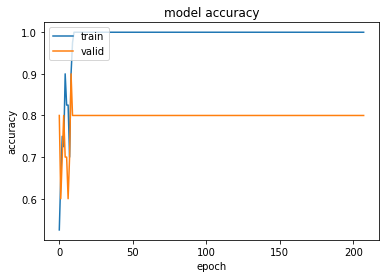

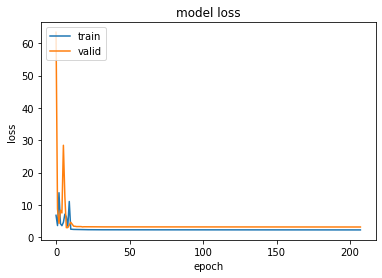

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1, 600, 63)]      0         
                                                                 
 conv2d_12 (Conv2D)          (None, 1, 600, 63)        254079    
                                                                 
 batch_normalization_12 (Bat  (None, 1, 600, 63)       252       
 chNormalization)                                                
                                                                 
 average_pooling2d_12 (Avera  (None, 1, 100, 63)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_13 (Conv2D)          (None, 1, 100, 10)        20170     
                                                                 
 batch_normalization_13 (Bat  (None, 1, 100, 10)       40  

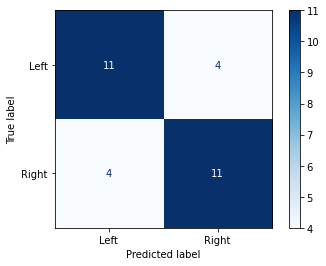

Accuracy: 0.7333333492279053
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1]


In [ ]:
from tensorflow.keras.layers import Concatenate, AveragePooling2D, BatchNormalization, Conv2D, Conv2DTranspose, Dense, Input, Reshape, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, Nadam
import tensorflow as tf
from tensorflow.keras import backend as K
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import os
import time
from sklearn.metrics import classification_report, f1_score
from min2net.loss import mean_squared_error, triplet_loss, SparseCategoricalCrossentropy
from min2net.utils import TimeHistory, compute_class_weight

class MIN2Net:
    def __init__(self,
                input_shape=(1,400,20), 
                num_class=2, 
                loss=[mean_squared_error, triplet_loss(margin=1.0), 'sparse_categorical_crossentropy'],  #
                loss_weights=[0.1, 1, 0.1], 
                latent_dim = None,
                epochs=1000,
                batch_size=100,
                optimizer=Nadam(beta_1=0.9, beta_2=0.999, epsilon=1e-07),
                lr=1e-2,
                min_lr=1e-4,
                factor=0.5,
                patience=5, 
                es_patience=200,
                verbose=1,
                log_path='logs',
                model_name='MIN2Net', 
                **kwargs):
        D, T, C = input_shape
        self.latent_dim = latent_dim if latent_dim is not None else C if num_class==2 else 64
        self.num_class = num_class
        self.input_shape = input_shape
        self.loss = loss
        self.loss_weights = loss_weights
        self.epochs = epochs
        self.batch_size = batch_size
        self.optimizer = optimizer
        self.optimizer.lr = lr
        self.lr = lr
        self.min_lr = min_lr
        self.factor = factor
        self.patience = patience
        self.es_patience = es_patience
        self.verbose = verbose
        self.log_path = log_path
        self.model_name = model_name
        self.weights_dir = log_path+'/'+model_name+'_out_weights.h5'
        self.csv_dir = log_path+'/'+model_name+'_out_log.log'
        self.time_log = log_path+'/'+model_name+'_time_log.csv'

        # use **kwargs to set the new value of below args.
        self.f1_average = 'binary' if self.num_class == 2 else 'macro'
        self.data_format = 'channels_last'
        self.shuffle = False
        self.metrics = 'accuracy'
        self.monitor = 'val_loss'
        self.mode = 'min'
        self.save_best_only = True
        self.save_weight_only = True
        self.seed = 1234
        self.class_balancing = False
        # 'set params'
        self.subsampling_size = 100
        self.pool_size_1 = (1,T//self.subsampling_size)
        self.pool_size_2 = (1,4)
        self.filter_1 = C
        self.filter_2 = 10
        
        for k in kwargs.keys():
            self.__setattr__(k, kwargs[k])
        
        self.flatten_size = T//self.pool_size_1[1]//self.pool_size_2[1]
        
        np.random.seed(self.seed)
        tf.random.set_seed(self.seed)
        K.set_image_data_format(self.data_format)
        if not os.path.exists(self.log_path):
            os.makedirs(self.log_path)

    def build(self):
        'encoder'
        encoder_input  = Input(self.input_shape)
        en_conv        = Conv2D(self.filter_1, (1, 64), activation='elu', padding="same", 
                                kernel_constraint=max_norm(2., axis=(0, 1, 2)))(encoder_input)
        en_conv        = BatchNormalization(axis=3, epsilon=1e-05, momentum=0.1)(en_conv)
        en_conv        = AveragePooling2D(pool_size=self.pool_size_1)(en_conv)  
        en_conv        = Conv2D(self.filter_2, (1, 32), activation='elu', padding="same", 
                                kernel_constraint=max_norm(2., axis=(0, 1, 2)))(en_conv)
        en_conv        = BatchNormalization(axis=3, epsilon=1e-05, momentum=0.1)(en_conv)
        en_conv        = AveragePooling2D(pool_size=self.pool_size_2)(en_conv)
        en_conv        = Flatten()(en_conv)
        encoder_output = Dense(self.latent_dim, kernel_constraint=max_norm(0.5))(en_conv)
        encoder        = Model(inputs=encoder_input, outputs=encoder_output, name='encoder')
        encoder.summary()
        
        'decoder'
        decoder_input  = Input(shape=(self.latent_dim,), name='decoder_input')
        de_conv        = Dense(1*self.flatten_size*self.filter_2, activation='elu', 
                               kernel_constraint=max_norm(0.5))(decoder_input)
        de_conv        = Reshape((1, self.flatten_size, self.filter_2))(de_conv)
        de_conv        = Conv2DTranspose(filters=self.filter_2, kernel_size=(1, 64), 
                                         activation='elu', padding='same', strides=self.pool_size_2, 
                                         kernel_constraint=max_norm(2., axis=(0, 1, 2)))(de_conv)
        decoder_output = Conv2DTranspose(filters=self.filter_1, kernel_size=(1, 32), 
                                         activation='elu', padding='same', strides=self.pool_size_1, 
                                         kernel_constraint=max_norm(2., axis=(0, 1, 2)))(de_conv)
        decoder        = Model(inputs=decoder_input, outputs=decoder_output, name='decoder')
        decoder.summary()

        'Build the computation graph for training'
        latent         = encoder(encoder_input)
        train_xr       = decoder(latent)
        z              = Dense(self.num_class, activation='softmax', kernel_constraint=max_norm(0.5), 
                               name='classifier')(latent)

        return Model(inputs=encoder_input, outputs=[train_xr, latent, z], 
                            name='MIN2Net')
    
    def fit(self, X_train, y_train, X_val, y_val):
            
        if X_train.ndim != 4:
            raise Exception('ValueError: `X_train` is incompatible: expected ndim=4, found ndim='+str(X_train.ndim))
        elif X_val.ndim != 4:
            raise Exception('ValueError: `X_val` is incompatible: expected ndim=4, found ndim='+str(X_val.ndim))

        csv_logger    = CSVLogger(self.csv_dir)
        time_callback = TimeHistory(self.time_log)
        checkpointer  = ModelCheckpoint(monitor=self.monitor, filepath=self.weights_dir, 
                                        verbose=self.verbose, save_best_only=self.save_best_only, 
                                        save_weight_only=self.save_weight_only)
        reduce_lr     = ReduceLROnPlateau(monitor=self.monitor, patience=self.patience, 
                                          factor=self.factor, mode=self.mode, verbose=self.verbose, 
                                          min_lr=self.min_lr)
        es            = EarlyStopping(monitor=self.monitor, mode=self.mode, verbose=self.verbose, 
                                      patience=self.es_patience)
        model = self.build()     
        model.summary()
        
        if self.class_balancing: # compute_class_weight if class_balancing is True
            class_weight  = compute_class_weight(y_train)
            self.loss[-1] = SparseCategoricalCrossentropy(class_weight=class_weight)
        
        model.compile(optimizer=self.optimizer, loss=self.loss, metrics=self.metrics, loss_weights=self.loss_weights)

        history = model.fit(x=X_train, y=[X_train,y_train,y_train],
                          batch_size=self.batch_size, shuffle=self.shuffle,
                          epochs=self.epochs, validation_data=(X_val, [X_val,y_val,y_val]),
                          callbacks=[checkpointer,csv_logger,reduce_lr,es, time_callback])
        return history
    def predict(self, X_test, y_test):

        if X_test.ndim != 4:
            raise Exception('ValueError: `X_test` is incompatible: expected ndim=4, found ndim='+str(X_test.ndim))

        model = self.build()
        model.summary()
        model.load_weights(self.weights_dir)
        model.compile(optimizer=self.optimizer, loss=self.loss, metrics=self.metrics, loss_weights=self.loss_weights)

        start = time.time()
        y_pred_decoder, y_pred_trip, y_pred_clf = model.predict(X_test)
        end = time.time()
        loss, decoder_loss, trip_loss, classifier_loss, decoder_acc, trip_acc, classifier_acc  = model.evaluate(x=X_test,
                                                                                                                y=[X_test,y_test,y_test],
                                                                                                                batch_size=self.batch_size, 
                                                                                                                verbose=self.verbose)
        y_pred_argm = np.argmax(y_pred_clf, axis=1)
        print("F1-score is computed based on {}".format(self.f1_average))
        f1 = f1_score(y_test, y_pred_argm, average=self.f1_average)
        print('(loss: {}, accuracy: {})'.format(loss, classifier_acc))
        print(classification_report(y_test, y_pred_argm))
        evaluation = {'loss': loss, 
                      'decoder_loss': decoder_loss, 
                      'triplet_loss':trip_loss, 
                      'classifier_loss': classifier_loss, 
                      'accuracy': classifier_acc,
                      'f1-score': f1 ,
                      'prediction_time': end-start}
        Y = {'y_true': y_test,
             'y_pred': y_pred_argm,
             'y_pred_decoder': y_pred_decoder}
        cm = confusion_matrix(y_test, y_pred_argm)
        labels = ["Left", "Right"]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        return Y, evaluation, disp


import shutil
for k in range(1,2):
  # k=1
  X_train, y_train = loader.load_train_set(fold=k)
  X_val, y_val = loader.load_val_set(fold=k)
  X_test, y_test = loader.load_test_set(fold=k)

  # load dataset
  test_accuracy=[]

  log_path=str(k)
  print('log :', log_path)
  model = MIN2Net(input_shape=(1, 600, 63), num_class=2, monitor='val_loss')

  # model.fit(X_train, y_train, X_val, y_val)
  history=model.fit(X_train, y_train, X_val, y_val)
  print(history.history.keys())

  # summarize history for accuracy
  plt.plot(history.history['classifier_accuracy'])
  plt.plot(history.history['val_classifier_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()
  
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()

  Y, evaluation,disp = model.predict(X_test, y_test)
  Accuracy=evaluation.get('accuracy')
  # test_accuracy=[test_accuracy k]

  print('Accuracy:',Accuracy)

  disp.plot(cmap=plt.cm.Blues)
  plt.show()

  if os.path.exists('/content/logs'):
    shutil.rmtree('/content/logs')
  print('Accuracy:',evaluation.get('accuracy'))
  # Y = {'y_true': y_test,
  #              'y_pred': y_pred_argm,
  #              'y_pred_decoder': y_pred_decoder}
  y_true=Y.get('y_true')
  y_pred=Y.get('y_pred')
  print(y_true)
  print(y_pred)

fold2

change data_format to 'NTCD', new dimention is (40, 1, 600, 63)
change data_format to 'NTCD', new dimention is (10, 1, 600, 63)
change data_format to 'NTCD', new dimention is (30, 1, 600, 63)
log : 2
Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1, 600, 63)]      0         
                                                                 
 conv2d_18 (Conv2D)          (None, 1, 600, 63)        254079    
                                                                 
 batch_normalization_18 (Bat  (None, 1, 600, 63)       252       
 chNormalization)                                                
                                                                 
 average_pooling2d_18 (Avera  (None, 1, 100, 63)       0         
 gePooling2D)                                                    
                                                         

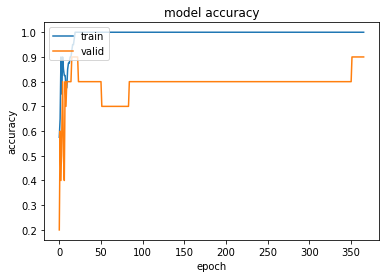

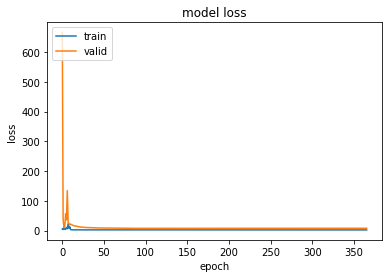

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1, 600, 63)]      0         
                                                                 
 conv2d_20 (Conv2D)          (None, 1, 600, 63)        254079    
                                                                 
 batch_normalization_20 (Bat  (None, 1, 600, 63)       252       
 chNormalization)                                                
                                                                 
 average_pooling2d_20 (Avera  (None, 1, 100, 63)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_21 (Conv2D)          (None, 1, 100, 10)        20170     
                                                                 
 batch_normalization_21 (Bat  (None, 1, 100, 10)       40  

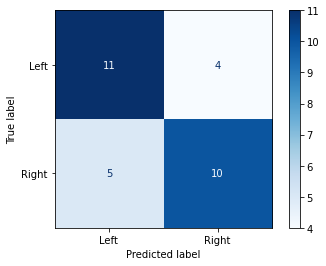

Accuracy: 0.699999988079071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1]


In [ ]:
from min2net.utils import DataLoader

loader = DataLoader(dataset='SMR_BCI', 
                    train_type='subject_dependent', 
                    subject=10, 
                    data_format='NTCD', # for MIN2Net
                    data_type='time_domain', 
                    dataset_path='datasets')

from tensorflow.keras.layers import Concatenate, AveragePooling2D, BatchNormalization, Conv2D, Conv2DTranspose, Dense, Input, Reshape, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, Nadam
import tensorflow as tf
from tensorflow.keras import backend as K
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import os
import time
from sklearn.metrics import classification_report, f1_score
from min2net.loss import mean_squared_error, triplet_loss, SparseCategoricalCrossentropy
from min2net.utils import TimeHistory, compute_class_weight

class MIN2Net:
    def __init__(self,
                input_shape=(1,400,20), 
                num_class=2, 
                loss=[mean_squared_error, triplet_loss(margin=1.0), 'sparse_categorical_crossentropy'],  #
                loss_weights=[0.1, 1, 0.1], 
                latent_dim = None,
                epochs=1000,
                batch_size=100,
                optimizer=Nadam(beta_1=0.9, beta_2=0.999, epsilon=1e-07),
                lr=1e-2,
                min_lr=1e-4,
                factor=0.5,
                patience=5, 
                es_patience=200,
                verbose=1,
                log_path='logs',
                model_name='MIN2Net', 
                **kwargs):
        D, T, C = input_shape
        self.latent_dim = latent_dim if latent_dim is not None else C if num_class==2 else 64
        self.num_class = num_class
        self.input_shape = input_shape
        self.loss = loss
        self.loss_weights = loss_weights
        self.epochs = epochs
        self.batch_size = batch_size
        self.optimizer = optimizer
        self.optimizer.lr = lr
        self.lr = lr
        self.min_lr = min_lr
        self.factor = factor
        self.patience = patience
        self.es_patience = es_patience
        self.verbose = verbose
        self.log_path = log_path
        self.model_name = model_name
        self.weights_dir = log_path+'/'+model_name+'_out_weights.h5'
        self.csv_dir = log_path+'/'+model_name+'_out_log.log'
        self.time_log = log_path+'/'+model_name+'_time_log.csv'

        # use **kwargs to set the new value of below args.
        self.f1_average = 'binary' if self.num_class == 2 else 'macro'
        self.data_format = 'channels_last'
        self.shuffle = False
        self.metrics = 'accuracy'
        self.monitor = 'val_loss'
        self.mode = 'min'
        self.save_best_only = True
        self.save_weight_only = True
        self.seed = 1234
        self.class_balancing = False
        # 'set params'
        self.subsampling_size = 100
        self.pool_size_1 = (1,T//self.subsampling_size)
        self.pool_size_2 = (1,4)
        self.filter_1 = C
        self.filter_2 = 10
        
        for k in kwargs.keys():
            self.__setattr__(k, kwargs[k])
        
        self.flatten_size = T//self.pool_size_1[1]//self.pool_size_2[1]
        
        np.random.seed(self.seed)
        tf.random.set_seed(self.seed)
        K.set_image_data_format(self.data_format)
        if not os.path.exists(self.log_path):
            os.makedirs(self.log_path)

    def build(self):
        'encoder'
        encoder_input  = Input(self.input_shape)
        en_conv        = Conv2D(self.filter_1, (1, 64), activation='elu', padding="same", 
                                kernel_constraint=max_norm(2., axis=(0, 1, 2)))(encoder_input)
        en_conv        = BatchNormalization(axis=3, epsilon=1e-05, momentum=0.1)(en_conv)
        en_conv        = AveragePooling2D(pool_size=self.pool_size_1)(en_conv)  
        en_conv        = Conv2D(self.filter_2, (1, 32), activation='elu', padding="same", 
                                kernel_constraint=max_norm(2., axis=(0, 1, 2)))(en_conv)
        en_conv        = BatchNormalization(axis=3, epsilon=1e-05, momentum=0.1)(en_conv)
        en_conv        = AveragePooling2D(pool_size=self.pool_size_2)(en_conv)
        en_conv        = Flatten()(en_conv)
        encoder_output = Dense(self.latent_dim, kernel_constraint=max_norm(0.5))(en_conv)
        encoder        = Model(inputs=encoder_input, outputs=encoder_output, name='encoder')
        encoder.summary()
        
        'decoder'
        decoder_input  = Input(shape=(self.latent_dim,), name='decoder_input')
        de_conv        = Dense(1*self.flatten_size*self.filter_2, activation='elu', 
                               kernel_constraint=max_norm(0.5))(decoder_input)
        de_conv        = Reshape((1, self.flatten_size, self.filter_2))(de_conv)
        de_conv        = Conv2DTranspose(filters=self.filter_2, kernel_size=(1, 64), 
                                         activation='elu', padding='same', strides=self.pool_size_2, 
                                         kernel_constraint=max_norm(2., axis=(0, 1, 2)))(de_conv)
        decoder_output = Conv2DTranspose(filters=self.filter_1, kernel_size=(1, 32), 
                                         activation='elu', padding='same', strides=self.pool_size_1, 
                                         kernel_constraint=max_norm(2., axis=(0, 1, 2)))(de_conv)
        decoder        = Model(inputs=decoder_input, outputs=decoder_output, name='decoder')
        decoder.summary()

        'Build the computation graph for training'
        latent         = encoder(encoder_input)
        train_xr       = decoder(latent)
        z              = Dense(self.num_class, activation='softmax', kernel_constraint=max_norm(0.5), 
                               name='classifier')(latent)

        return Model(inputs=encoder_input, outputs=[train_xr, latent, z], 
                            name='MIN2Net')
    
    def fit(self, X_train, y_train, X_val, y_val):
            
        if X_train.ndim != 4:
            raise Exception('ValueError: `X_train` is incompatible: expected ndim=4, found ndim='+str(X_train.ndim))
        elif X_val.ndim != 4:
            raise Exception('ValueError: `X_val` is incompatible: expected ndim=4, found ndim='+str(X_val.ndim))

        csv_logger    = CSVLogger(self.csv_dir)
        time_callback = TimeHistory(self.time_log)
        checkpointer  = ModelCheckpoint(monitor=self.monitor, filepath=self.weights_dir, 
                                        verbose=self.verbose, save_best_only=self.save_best_only, 
                                        save_weight_only=self.save_weight_only)
        reduce_lr     = ReduceLROnPlateau(monitor=self.monitor, patience=self.patience, 
                                          factor=self.factor, mode=self.mode, verbose=self.verbose, 
                                          min_lr=self.min_lr)
        es            = EarlyStopping(monitor=self.monitor, mode=self.mode, verbose=self.verbose, 
                                      patience=self.es_patience)
        model = self.build()     
        model.summary()
        
        if self.class_balancing: # compute_class_weight if class_balancing is True
            class_weight  = compute_class_weight(y_train)
            self.loss[-1] = SparseCategoricalCrossentropy(class_weight=class_weight)
        
        model.compile(optimizer=self.optimizer, loss=self.loss, metrics=self.metrics, loss_weights=self.loss_weights)

        history = model.fit(x=X_train, y=[X_train,y_train,y_train],
                          batch_size=self.batch_size, shuffle=self.shuffle,
                          epochs=self.epochs, validation_data=(X_val, [X_val,y_val,y_val]),
                          callbacks=[checkpointer,csv_logger,reduce_lr,es, time_callback])
        return history
    def predict(self, X_test, y_test):

        if X_test.ndim != 4:
            raise Exception('ValueError: `X_test` is incompatible: expected ndim=4, found ndim='+str(X_test.ndim))

        model = self.build()
        model.summary()
        model.load_weights(self.weights_dir)
        model.compile(optimizer=self.optimizer, loss=self.loss, metrics=self.metrics, loss_weights=self.loss_weights)

        start = time.time()
        y_pred_decoder, y_pred_trip, y_pred_clf = model.predict(X_test)
        end = time.time()
        loss, decoder_loss, trip_loss, classifier_loss, decoder_acc, trip_acc, classifier_acc  = model.evaluate(x=X_test,
                                                                                                                y=[X_test,y_test,y_test],
                                                                                                                batch_size=self.batch_size, 
                                                                                                                verbose=self.verbose)
        y_pred_argm = np.argmax(y_pred_clf, axis=1)
        print("F1-score is computed based on {}".format(self.f1_average))
        f1 = f1_score(y_test, y_pred_argm, average=self.f1_average)
        print('(loss: {}, accuracy: {})'.format(loss, classifier_acc))
        print(classification_report(y_test, y_pred_argm))
        evaluation = {'loss': loss, 
                      'decoder_loss': decoder_loss, 
                      'triplet_loss':trip_loss, 
                      'classifier_loss': classifier_loss, 
                      'accuracy': classifier_acc,
                      'f1-score': f1 ,
                      'prediction_time': end-start}
        Y = {'y_true': y_test,
             'y_pred': y_pred_argm,
             'y_pred_decoder': y_pred_decoder}
        cm = confusion_matrix(y_test, y_pred_argm)
        labels = ["Left", "Right"]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        return Y, evaluation, disp


import shutil
for k in range(2,3):
  # k=1
  X_train, y_train = loader.load_train_set(fold=k)
  X_val, y_val = loader.load_val_set(fold=k)
  X_test, y_test = loader.load_test_set(fold=k)

  # load dataset
  test_accuracy=[]

  log_path=str(k)
  print('log :', log_path)
  model = MIN2Net(input_shape=(1, 600, 63), num_class=2, monitor='val_loss')

  # model.fit(X_train, y_train, X_val, y_val)
  history=model.fit(X_train, y_train, X_val, y_val)
  print(history.history.keys())

  # summarize history for accuracy
  plt.plot(history.history['classifier_accuracy'])
  plt.plot(history.history['val_classifier_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()
  
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()

  Y, evaluation,disp = model.predict(X_test, y_test)
  Accuracy=evaluation.get('accuracy')
  # test_accuracy=[test_accuracy k]

  print('Accuracy:',Accuracy)

  disp.plot(cmap=plt.cm.Blues)
  plt.show()

  if os.path.exists('/content/logs'):
    shutil.rmtree('/content/logs')
  print('Accuracy:',evaluation.get('accuracy'))
  # Y = {'y_true': y_test,
  #              'y_pred': y_pred_argm,
  #              'y_pred_decoder': y_pred_decoder}
  y_true=Y.get('y_true')
  y_pred=Y.get('y_pred')
  print(y_true)
  print(y_pred)


fold3

change data_format to 'NTCD', new dimention is (40, 1, 600, 63)
change data_format to 'NTCD', new dimention is (10, 1, 600, 63)
change data_format to 'NTCD', new dimention is (30, 1, 600, 63)
log : 3
Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 1, 600, 63)]      0         
                                                                 
 conv2d_22 (Conv2D)          (None, 1, 600, 63)        254079    
                                                                 
 batch_normalization_22 (Bat  (None, 1, 600, 63)       252       
 chNormalization)                                                
                                                                 
 average_pooling2d_22 (Avera  (None, 1, 100, 63)       0         
 gePooling2D)                                                    
                                                         

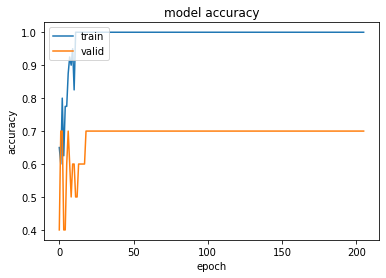

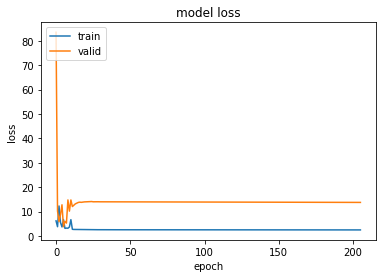

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 1, 600, 63)]      0         
                                                                 
 conv2d_24 (Conv2D)          (None, 1, 600, 63)        254079    
                                                                 
 batch_normalization_24 (Bat  (None, 1, 600, 63)       252       
 chNormalization)                                                
                                                                 
 average_pooling2d_24 (Avera  (None, 1, 100, 63)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_25 (Conv2D)          (None, 1, 100, 10)        20170     
                                                                 
 batch_normalization_25 (Bat  (None, 1, 100, 10)       40  

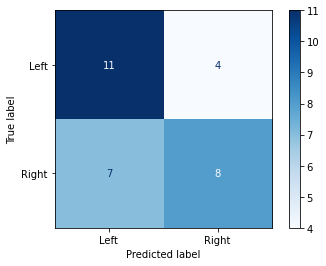

Accuracy: 0.6333333253860474
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0]


In [ ]:
from min2net.utils import DataLoader

loader = DataLoader(dataset='SMR_BCI', 
                    train_type='subject_dependent', 
                    subject=10, 
                    data_format='NTCD', # for MIN2Net
                    data_type='time_domain', 
                    dataset_path='datasets')

from tensorflow.keras.layers import Concatenate, AveragePooling2D, BatchNormalization, Conv2D, Conv2DTranspose, Dense, Input, Reshape, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, Nadam
import tensorflow as tf
from tensorflow.keras import backend as K
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import os
import time
from sklearn.metrics import classification_report, f1_score
from min2net.loss import mean_squared_error, triplet_loss, SparseCategoricalCrossentropy
from min2net.utils import TimeHistory, compute_class_weight

class MIN2Net:
    def __init__(self,
                input_shape=(1,400,20), 
                num_class=2, 
                loss=[mean_squared_error, triplet_loss(margin=1.0), 'sparse_categorical_crossentropy'],  #
                loss_weights=[0.1, 1, 0.1], 
                latent_dim = None,
                epochs=1000,
                batch_size=100,
                optimizer=Nadam(beta_1=0.9, beta_2=0.999, epsilon=1e-07),
                lr=1e-2,
                min_lr=1e-4,
                factor=0.5,
                patience=5, 
                es_patience=200,
                verbose=1,
                log_path='logs',
                model_name='MIN2Net', 
                **kwargs):
        D, T, C = input_shape
        self.latent_dim = latent_dim if latent_dim is not None else C if num_class==2 else 64
        self.num_class = num_class
        self.input_shape = input_shape
        self.loss = loss
        self.loss_weights = loss_weights
        self.epochs = epochs
        self.batch_size = batch_size
        self.optimizer = optimizer
        self.optimizer.lr = lr
        self.lr = lr
        self.min_lr = min_lr
        self.factor = factor
        self.patience = patience
        self.es_patience = es_patience
        self.verbose = verbose
        self.log_path = log_path
        self.model_name = model_name
        self.weights_dir = log_path+'/'+model_name+'_out_weights.h5'
        self.csv_dir = log_path+'/'+model_name+'_out_log.log'
        self.time_log = log_path+'/'+model_name+'_time_log.csv'

        # use **kwargs to set the new value of below args.
        self.f1_average = 'binary' if self.num_class == 2 else 'macro'
        self.data_format = 'channels_last'
        self.shuffle = False
        self.metrics = 'accuracy'
        self.monitor = 'val_loss'
        self.mode = 'min'
        self.save_best_only = True
        self.save_weight_only = True
        self.seed = 1234
        self.class_balancing = False
        # 'set params'
        self.subsampling_size = 100
        self.pool_size_1 = (1,T//self.subsampling_size)
        self.pool_size_2 = (1,4)
        self.filter_1 = C
        self.filter_2 = 10
        
        for k in kwargs.keys():
            self.__setattr__(k, kwargs[k])
        
        self.flatten_size = T//self.pool_size_1[1]//self.pool_size_2[1]
        
        np.random.seed(self.seed)
        tf.random.set_seed(self.seed)
        K.set_image_data_format(self.data_format)
        if not os.path.exists(self.log_path):
            os.makedirs(self.log_path)

    def build(self):
        'encoder'
        encoder_input  = Input(self.input_shape)
        en_conv        = Conv2D(self.filter_1, (1, 64), activation='elu', padding="same", 
                                kernel_constraint=max_norm(2., axis=(0, 1, 2)))(encoder_input)
        en_conv        = BatchNormalization(axis=3, epsilon=1e-05, momentum=0.1)(en_conv)
        en_conv        = AveragePooling2D(pool_size=self.pool_size_1)(en_conv)  
        en_conv        = Conv2D(self.filter_2, (1, 32), activation='elu', padding="same", 
                                kernel_constraint=max_norm(2., axis=(0, 1, 2)))(en_conv)
        en_conv        = BatchNormalization(axis=3, epsilon=1e-05, momentum=0.1)(en_conv)
        en_conv        = AveragePooling2D(pool_size=self.pool_size_2)(en_conv)
        en_conv        = Flatten()(en_conv)
        encoder_output = Dense(self.latent_dim, kernel_constraint=max_norm(0.5))(en_conv)
        encoder        = Model(inputs=encoder_input, outputs=encoder_output, name='encoder')
        encoder.summary()
        
        'decoder'
        decoder_input  = Input(shape=(self.latent_dim,), name='decoder_input')
        de_conv        = Dense(1*self.flatten_size*self.filter_2, activation='elu', 
                               kernel_constraint=max_norm(0.5))(decoder_input)
        de_conv        = Reshape((1, self.flatten_size, self.filter_2))(de_conv)
        de_conv        = Conv2DTranspose(filters=self.filter_2, kernel_size=(1, 64), 
                                         activation='elu', padding='same', strides=self.pool_size_2, 
                                         kernel_constraint=max_norm(2., axis=(0, 1, 2)))(de_conv)
        decoder_output = Conv2DTranspose(filters=self.filter_1, kernel_size=(1, 32), 
                                         activation='elu', padding='same', strides=self.pool_size_1, 
                                         kernel_constraint=max_norm(2., axis=(0, 1, 2)))(de_conv)
        decoder        = Model(inputs=decoder_input, outputs=decoder_output, name='decoder')
        decoder.summary()

        'Build the computation graph for training'
        latent         = encoder(encoder_input)
        train_xr       = decoder(latent)
        z              = Dense(self.num_class, activation='softmax', kernel_constraint=max_norm(0.5), 
                               name='classifier')(latent)

        return Model(inputs=encoder_input, outputs=[train_xr, latent, z], 
                            name='MIN2Net')
    
    def fit(self, X_train, y_train, X_val, y_val):
            
        if X_train.ndim != 4:
            raise Exception('ValueError: `X_train` is incompatible: expected ndim=4, found ndim='+str(X_train.ndim))
        elif X_val.ndim != 4:
            raise Exception('ValueError: `X_val` is incompatible: expected ndim=4, found ndim='+str(X_val.ndim))

        csv_logger    = CSVLogger(self.csv_dir)
        time_callback = TimeHistory(self.time_log)
        checkpointer  = ModelCheckpoint(monitor=self.monitor, filepath=self.weights_dir, 
                                        verbose=self.verbose, save_best_only=self.save_best_only, 
                                        save_weight_only=self.save_weight_only)
        reduce_lr     = ReduceLROnPlateau(monitor=self.monitor, patience=self.patience, 
                                          factor=self.factor, mode=self.mode, verbose=self.verbose, 
                                          min_lr=self.min_lr)
        es            = EarlyStopping(monitor=self.monitor, mode=self.mode, verbose=self.verbose, 
                                      patience=self.es_patience)
        model = self.build()     
        model.summary()
        
        if self.class_balancing: # compute_class_weight if class_balancing is True
            class_weight  = compute_class_weight(y_train)
            self.loss[-1] = SparseCategoricalCrossentropy(class_weight=class_weight)
        
        model.compile(optimizer=self.optimizer, loss=self.loss, metrics=self.metrics, loss_weights=self.loss_weights)

        history = model.fit(x=X_train, y=[X_train,y_train,y_train],
                          batch_size=self.batch_size, shuffle=self.shuffle,
                          epochs=self.epochs, validation_data=(X_val, [X_val,y_val,y_val]),
                          callbacks=[checkpointer,csv_logger,reduce_lr,es, time_callback])
        return history
    def predict(self, X_test, y_test):

        if X_test.ndim != 4:
            raise Exception('ValueError: `X_test` is incompatible: expected ndim=4, found ndim='+str(X_test.ndim))

        model = self.build()
        model.summary()
        model.load_weights(self.weights_dir)
        model.compile(optimizer=self.optimizer, loss=self.loss, metrics=self.metrics, loss_weights=self.loss_weights)

        start = time.time()
        y_pred_decoder, y_pred_trip, y_pred_clf = model.predict(X_test)
        end = time.time()
        loss, decoder_loss, trip_loss, classifier_loss, decoder_acc, trip_acc, classifier_acc  = model.evaluate(x=X_test,
                                                                                                                y=[X_test,y_test,y_test],
                                                                                                                batch_size=self.batch_size, 
                                                                                                                verbose=self.verbose)
        y_pred_argm = np.argmax(y_pred_clf, axis=1)
        print("F1-score is computed based on {}".format(self.f1_average))
        f1 = f1_score(y_test, y_pred_argm, average=self.f1_average)
        print('(loss: {}, accuracy: {})'.format(loss, classifier_acc))
        print(classification_report(y_test, y_pred_argm))
        evaluation = {'loss': loss, 
                      'decoder_loss': decoder_loss, 
                      'triplet_loss':trip_loss, 
                      'classifier_loss': classifier_loss, 
                      'accuracy': classifier_acc,
                      'f1-score': f1 ,
                      'prediction_time': end-start}
        Y = {'y_true': y_test,
             'y_pred': y_pred_argm,
             'y_pred_decoder': y_pred_decoder}
        cm = confusion_matrix(y_test, y_pred_argm)
        labels = ["Left", "Right"]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        return Y, evaluation, disp


import shutil
for k in range(3,4):
  # k=1
  X_train, y_train = loader.load_train_set(fold=k)
  X_val, y_val = loader.load_val_set(fold=k)
  X_test, y_test = loader.load_test_set(fold=k)

  # load dataset
  test_accuracy=[]

  log_path=str(k)
  print('log :', log_path)
  model = MIN2Net(input_shape=(1, 600, 63), num_class=2, monitor='val_loss')

  # model.fit(X_train, y_train, X_val, y_val)
  history=model.fit(X_train, y_train, X_val, y_val)
  print(history.history.keys())

  # summarize history for accuracy
  plt.plot(history.history['classifier_accuracy'])
  plt.plot(history.history['val_classifier_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()
  
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()

  Y, evaluation,disp = model.predict(X_test, y_test)
  Accuracy=evaluation.get('accuracy')
  # test_accuracy=[test_accuracy k]

  print('Accuracy:',Accuracy)

  disp.plot(cmap=plt.cm.Blues)
  plt.show()

  if os.path.exists('/content/logs'):
    shutil.rmtree('/content/logs')
  print('Accuracy:',evaluation.get('accuracy'))
  # Y = {'y_true': y_test,
  #              'y_pred': y_pred_argm,
  #              'y_pred_decoder': y_pred_decoder}
  y_true=Y.get('y_true')
  y_pred=Y.get('y_pred')
  print(y_true)
  print(y_pred)


## MIN2Net model example

change data_format to 'NTCD', new dimention is (40, 1, 600, 63)
change data_format to 'NTCD', new dimention is (10, 1, 600, 63)
change data_format to 'NTCD', new dimention is (30, 1, 600, 63)
log : 1
Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1, 600, 63)]      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 1, 600, 63)        254079    
                                                                 
 batch_normalization_14 (Bat  (None, 1, 600, 63)       252       
 chNormalization)                                                
                                                                 
 average_pooling2d_14 (Avera  (None, 1, 100, 63)       0         
 gePooling2D)                                                    
                                                         

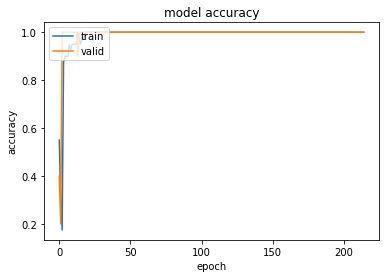

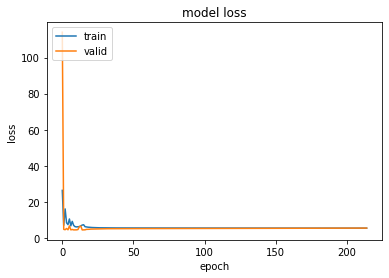

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1, 600, 63)]      0         
                                                                 
 conv2d_16 (Conv2D)          (None, 1, 600, 63)        254079    
                                                                 
 batch_normalization_16 (Bat  (None, 1, 600, 63)       252       
 chNormalization)                                                
                                                                 
 average_pooling2d_16 (Avera  (None, 1, 100, 63)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_17 (Conv2D)          (None, 1, 100, 10)        20170     
                                                                 
 batch_normalization_17 (Bat  (None, 1, 100, 10)       40  

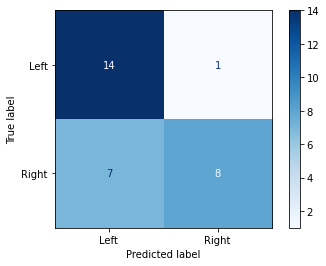

Accuracy: 0.7333333492279053
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1]


In [ ]:
from min2net.utils import DataLoader

loader = DataLoader(dataset='SMR_BCI', 
                    train_type='subject_dependent', 
                    subject=15, 
                    data_format='NTCD', # for MIN2Net
                    data_type='time_domain', 
                    dataset_path='datasets')

from tensorflow.keras.layers import Concatenate, AveragePooling2D, BatchNormalization, Conv2D, Conv2DTranspose, Dense, Input, Reshape, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, Nadam
import tensorflow as tf
from tensorflow.keras import backend as K
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import os
import time
from sklearn.metrics import classification_report, f1_score
from min2net.loss import mean_squared_error, triplet_loss, SparseCategoricalCrossentropy
from min2net.utils import TimeHistory, compute_class_weight

class MIN2Net:
    def __init__(self,
                input_shape=(1,400,20), 
                num_class=2, 
                loss=[mean_squared_error, triplet_loss(margin=1.0), 'sparse_categorical_crossentropy'],  #
                loss_weights=[0.1, 1, 0.1], 
                latent_dim = None,
                epochs=1000,
                batch_size=100,
                optimizer=Nadam(beta_1=0.9, beta_2=0.999, epsilon=1e-07),
                lr=1e-2,
                min_lr=1e-4,
                factor=0.5,
                patience=5, 
                es_patience=200,
                verbose=1,
                log_path='logs',
                model_name='MIN2Net', 
                **kwargs):
        D, T, C = input_shape
        self.latent_dim = latent_dim if latent_dim is not None else C if num_class==2 else 64
        self.num_class = num_class
        self.input_shape = input_shape
        self.loss = loss
        self.loss_weights = loss_weights
        self.epochs = epochs
        self.batch_size = batch_size
        self.optimizer = optimizer
        self.optimizer.lr = lr
        self.lr = lr
        self.min_lr = min_lr
        self.factor = factor
        self.patience = patience
        self.es_patience = es_patience
        self.verbose = verbose
        self.log_path = log_path
        self.model_name = model_name
        self.weights_dir = log_path+'/'+model_name+'_out_weights.h5'
        self.csv_dir = log_path+'/'+model_name+'_out_log.log'
        self.time_log = log_path+'/'+model_name+'_time_log.csv'

        # use **kwargs to set the new value of below args.
        self.f1_average = 'binary' if self.num_class == 2 else 'macro'
        self.data_format = 'channels_last'
        self.shuffle = False
        self.metrics = 'accuracy'
        self.monitor = 'val_loss'
        self.mode = 'min'
        self.save_best_only = True
        self.save_weight_only = True
        self.seed = 1234
        self.class_balancing = False
        # 'set params'
        self.subsampling_size = 100
        self.pool_size_1 = (1,T//self.subsampling_size)
        self.pool_size_2 = (1,4)
        self.filter_1 = C
        self.filter_2 = 10
        
        for k in kwargs.keys():
            self.__setattr__(k, kwargs[k])
        
        self.flatten_size = T//self.pool_size_1[1]//self.pool_size_2[1]
        
        np.random.seed(self.seed)
        tf.random.set_seed(self.seed)
        K.set_image_data_format(self.data_format)
        if not os.path.exists(self.log_path):
            os.makedirs(self.log_path)

    def build(self):
        'encoder'
        encoder_input  = Input(self.input_shape)
        en_conv        = Conv2D(self.filter_1, (1, 64), activation='elu', padding="same", 
                                kernel_constraint=max_norm(2., axis=(0, 1, 2)))(encoder_input)
        en_conv        = BatchNormalization(axis=3, epsilon=1e-05, momentum=0.1)(en_conv)
        en_conv        = AveragePooling2D(pool_size=self.pool_size_1)(en_conv)  
        en_conv        = Conv2D(self.filter_2, (1, 32), activation='elu', padding="same", 
                                kernel_constraint=max_norm(2., axis=(0, 1, 2)))(en_conv)
        en_conv        = BatchNormalization(axis=3, epsilon=1e-05, momentum=0.1)(en_conv)
        en_conv        = AveragePooling2D(pool_size=self.pool_size_2)(en_conv)
        en_conv        = Flatten()(en_conv)
        encoder_output = Dense(self.latent_dim, kernel_constraint=max_norm(0.5))(en_conv)
        encoder        = Model(inputs=encoder_input, outputs=encoder_output, name='encoder')
        encoder.summary()
        
        'decoder'
        decoder_input  = Input(shape=(self.latent_dim,), name='decoder_input')
        de_conv        = Dense(1*self.flatten_size*self.filter_2, activation='elu', 
                               kernel_constraint=max_norm(0.5))(decoder_input)
        de_conv        = Reshape((1, self.flatten_size, self.filter_2))(de_conv)
        de_conv        = Conv2DTranspose(filters=self.filter_2, kernel_size=(1, 64), 
                                         activation='elu', padding='same', strides=self.pool_size_2, 
                                         kernel_constraint=max_norm(2., axis=(0, 1, 2)))(de_conv)
        decoder_output = Conv2DTranspose(filters=self.filter_1, kernel_size=(1, 32), 
                                         activation='elu', padding='same', strides=self.pool_size_1, 
                                         kernel_constraint=max_norm(2., axis=(0, 1, 2)))(de_conv)
        decoder        = Model(inputs=decoder_input, outputs=decoder_output, name='decoder')
        decoder.summary()

        'Build the computation graph for training'
        latent         = encoder(encoder_input)
        train_xr       = decoder(latent)
        z              = Dense(self.num_class, activation='softmax', kernel_constraint=max_norm(0.5), 
                               name='classifier')(latent)

        return Model(inputs=encoder_input, outputs=[train_xr, latent, z], 
                            name='MIN2Net')
    
    def fit(self, X_train, y_train, X_val, y_val):
            
        if X_train.ndim != 4:
            raise Exception('ValueError: `X_train` is incompatible: expected ndim=4, found ndim='+str(X_train.ndim))
        elif X_val.ndim != 4:
            raise Exception('ValueError: `X_val` is incompatible: expected ndim=4, found ndim='+str(X_val.ndim))

        csv_logger    = CSVLogger(self.csv_dir)
        time_callback = TimeHistory(self.time_log)
        checkpointer  = ModelCheckpoint(monitor=self.monitor, filepath=self.weights_dir, 
                                        verbose=self.verbose, save_best_only=self.save_best_only, 
                                        save_weight_only=self.save_weight_only)
        reduce_lr     = ReduceLROnPlateau(monitor=self.monitor, patience=self.patience, 
                                          factor=self.factor, mode=self.mode, verbose=self.verbose, 
                                          min_lr=self.min_lr)
        es            = EarlyStopping(monitor=self.monitor, mode=self.mode, verbose=self.verbose, 
                                      patience=self.es_patience)
        model = self.build()     
        model.summary()
        
        if self.class_balancing: # compute_class_weight if class_balancing is True
            class_weight  = compute_class_weight(y_train)
            self.loss[-1] = SparseCategoricalCrossentropy(class_weight=class_weight)
        
        model.compile(optimizer=self.optimizer, loss=self.loss, metrics=self.metrics, loss_weights=self.loss_weights)

        history = model.fit(x=X_train, y=[X_train,y_train,y_train],
                          batch_size=self.batch_size, shuffle=self.shuffle,
                          epochs=self.epochs, validation_data=(X_val, [X_val,y_val,y_val]),
                          callbacks=[checkpointer,csv_logger,reduce_lr,es, time_callback])
        return history
    def predict(self, X_test, y_test):

        if X_test.ndim != 4:
            raise Exception('ValueError: `X_test` is incompatible: expected ndim=4, found ndim='+str(X_test.ndim))

        model = self.build()
        model.summary()
        model.load_weights(self.weights_dir)
        model.compile(optimizer=self.optimizer, loss=self.loss, metrics=self.metrics, loss_weights=self.loss_weights)

        start = time.time()
        y_pred_decoder, y_pred_trip, y_pred_clf = model.predict(X_test)
        end = time.time()
        loss, decoder_loss, trip_loss, classifier_loss, decoder_acc, trip_acc, classifier_acc  = model.evaluate(x=X_test,
                                                                                                                y=[X_test,y_test,y_test],
                                                                                                                batch_size=self.batch_size, 
                                                                                                                verbose=self.verbose)
        y_pred_argm = np.argmax(y_pred_clf, axis=1)
        print("F1-score is computed based on {}".format(self.f1_average))
        f1 = f1_score(y_test, y_pred_argm, average=self.f1_average)
        print('(loss: {}, accuracy: {})'.format(loss, classifier_acc))
        print(classification_report(y_test, y_pred_argm))
        evaluation = {'loss': loss, 
                      'decoder_loss': decoder_loss, 
                      'triplet_loss':trip_loss, 
                      'classifier_loss': classifier_loss, 
                      'accuracy': classifier_acc,
                      'f1-score': f1 ,
                      'prediction_time': end-start}
        Y = {'y_true': y_test,
             'y_pred': y_pred_argm,
             'y_pred_decoder': y_pred_decoder}
        cm = confusion_matrix(y_test, y_pred_argm)
        labels = ["Left", "Right"]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        return Y, evaluation, disp


import shutil
for k in range(1,2):
  # k=1
  X_train, y_train = loader.load_train_set(fold=k)
  X_val, y_val = loader.load_val_set(fold=k)
  X_test, y_test = loader.load_test_set(fold=k)

  # load dataset
  test_accuracy=[]

  log_path=str(k)
  print('log :', log_path)
  model = MIN2Net(input_shape=(1, 600, 63), num_class=2, monitor='val_loss')

  # model.fit(X_train, y_train, X_val, y_val)
  history=model.fit(X_train, y_train, X_val, y_val)
  print(history.history.keys())

  # summarize history for accuracy
  plt.plot(history.history['classifier_accuracy'])
  plt.plot(history.history['val_classifier_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()
  
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()

  Y, evaluation,disp = model.predict(X_test, y_test)
  Accuracy=evaluation.get('accuracy')
  # test_accuracy=[test_accuracy k]

  print('Accuracy:',Accuracy)

  disp.plot(cmap=plt.cm.Blues)
  plt.show()

  if os.path.exists('/content/logs'):
    shutil.rmtree('/content/logs')
  print('Accuracy:',evaluation.get('accuracy'))
  # Y = {'y_true': y_test,
  #              'y_pred': y_pred_argm,
  #              'y_pred_decoder': y_pred_decoder}
  y_true=Y.get('y_true')
  y_pred=Y.get('y_pred')
  print(y_true)
  print(y_pred)


fold4

change data_format to 'NTCD', new dimention is (40, 1, 600, 63)
change data_format to 'NTCD', new dimention is (10, 1, 600, 63)
change data_format to 'NTCD', new dimention is (30, 1, 600, 63)
log : 4
Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 1, 600, 63)]      0         
                                                                 
 conv2d_26 (Conv2D)          (None, 1, 600, 63)        254079    
                                                                 
 batch_normalization_26 (Bat  (None, 1, 600, 63)       252       
 chNormalization)                                                
                                                                 
 average_pooling2d_26 (Avera  (None, 1, 100, 63)       0         
 gePooling2D)                                                    
                                                         

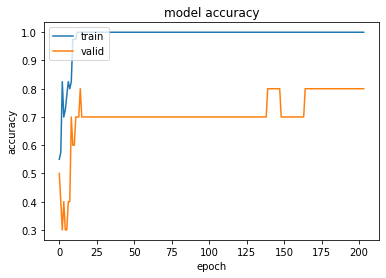

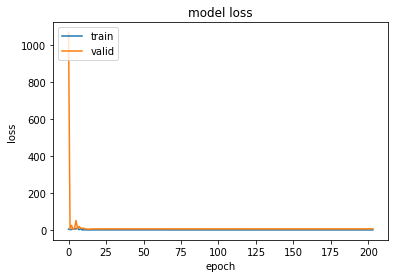

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 1, 600, 63)]      0         
                                                                 
 conv2d_28 (Conv2D)          (None, 1, 600, 63)        254079    
                                                                 
 batch_normalization_28 (Bat  (None, 1, 600, 63)       252       
 chNormalization)                                                
                                                                 
 average_pooling2d_28 (Avera  (None, 1, 100, 63)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_29 (Conv2D)          (None, 1, 100, 10)        20170     
                                                                 
 batch_normalization_29 (Bat  (None, 1, 100, 10)       40  

1/1 [==============================] - 1s 565ms/step - loss: 28.0710 - decoder_loss: 26.8003 - encoder_loss: 25.3246 - classifier_loss: 0.6629 - decoder_accuracy: 0.0177 - encoder_accuracy: 0.0000e+00 - classifier_accuracy: 0.6333
F1-score is computed based on binary
(loss: 28.070959091186523, accuracy: 0.6333333253860474)
              precision    recall  f1-score   support

         0.0       0.59      0.87      0.70        15
         1.0       0.75      0.40      0.52        15

    accuracy                           0.63        30
   macro avg       0.67      0.63      0.61        30
weighted avg       0.67      0.63      0.61        30

Accuracy: 0.6333333253860474


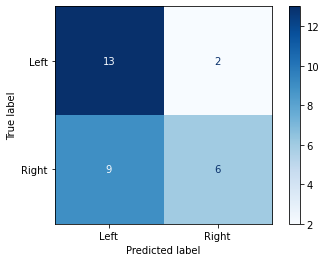

Accuracy: 0.6333333253860474
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0]


In [ ]:
from min2net.utils import DataLoader

loader = DataLoader(dataset='SMR_BCI', 
                    train_type='subject_dependent', 
                    subject=10, 
                    data_format='NTCD', # for MIN2Net
                    data_type='time_domain', 
                    dataset_path='datasets')

from tensorflow.keras.layers import Concatenate, AveragePooling2D, BatchNormalization, Conv2D, Conv2DTranspose, Dense, Input, Reshape, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, Nadam
import tensorflow as tf
from tensorflow.keras import backend as K
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import os
import time
from sklearn.metrics import classification_report, f1_score
from min2net.loss import mean_squared_error, triplet_loss, SparseCategoricalCrossentropy
from min2net.utils import TimeHistory, compute_class_weight

class MIN2Net:
    def __init__(self,
                input_shape=(1,400,20), 
                num_class=2, 
                loss=[mean_squared_error, triplet_loss(margin=1.0), 'sparse_categorical_crossentropy'],  #
                loss_weights=[0.1, 1, 0.1], 
                latent_dim = None,
                epochs=1000,
                batch_size=100,
                optimizer=Nadam(beta_1=0.9, beta_2=0.999, epsilon=1e-07),
                lr=1e-2,
                min_lr=1e-4,
                factor=0.5,
                patience=5, 
                es_patience=200,
                verbose=1,
                log_path='logs',
                model_name='MIN2Net', 
                **kwargs):
        D, T, C = input_shape
        self.latent_dim = latent_dim if latent_dim is not None else C if num_class==2 else 64
        self.num_class = num_class
        self.input_shape = input_shape
        self.loss = loss
        self.loss_weights = loss_weights
        self.epochs = epochs
        self.batch_size = batch_size
        self.optimizer = optimizer
        self.optimizer.lr = lr
        self.lr = lr
        self.min_lr = min_lr
        self.factor = factor
        self.patience = patience
        self.es_patience = es_patience
        self.verbose = verbose
        self.log_path = log_path
        self.model_name = model_name
        self.weights_dir = log_path+'/'+model_name+'_out_weights.h5'
        self.csv_dir = log_path+'/'+model_name+'_out_log.log'
        self.time_log = log_path+'/'+model_name+'_time_log.csv'

        # use **kwargs to set the new value of below args.
        self.f1_average = 'binary' if self.num_class == 2 else 'macro'
        self.data_format = 'channels_last'
        self.shuffle = False
        self.metrics = 'accuracy'
        self.monitor = 'val_loss'
        self.mode = 'min'
        self.save_best_only = True
        self.save_weight_only = True
        self.seed = 1234
        self.class_balancing = False
        # 'set params'
        self.subsampling_size = 100
        self.pool_size_1 = (1,T//self.subsampling_size)
        self.pool_size_2 = (1,4)
        self.filter_1 = C
        self.filter_2 = 10
        
        for k in kwargs.keys():
            self.__setattr__(k, kwargs[k])
        
        self.flatten_size = T//self.pool_size_1[1]//self.pool_size_2[1]
        
        np.random.seed(self.seed)
        tf.random.set_seed(self.seed)
        K.set_image_data_format(self.data_format)
        if not os.path.exists(self.log_path):
            os.makedirs(self.log_path)

    def build(self):
        'encoder'
        encoder_input  = Input(self.input_shape)
        en_conv        = Conv2D(self.filter_1, (1, 64), activation='elu', padding="same", 
                                kernel_constraint=max_norm(2., axis=(0, 1, 2)))(encoder_input)
        en_conv        = BatchNormalization(axis=3, epsilon=1e-05, momentum=0.1)(en_conv)
        en_conv        = AveragePooling2D(pool_size=self.pool_size_1)(en_conv)  
        en_conv        = Conv2D(self.filter_2, (1, 32), activation='elu', padding="same", 
                                kernel_constraint=max_norm(2., axis=(0, 1, 2)))(en_conv)
        en_conv        = BatchNormalization(axis=3, epsilon=1e-05, momentum=0.1)(en_conv)
        en_conv        = AveragePooling2D(pool_size=self.pool_size_2)(en_conv)
        en_conv        = Flatten()(en_conv)
        encoder_output = Dense(self.latent_dim, kernel_constraint=max_norm(0.5))(en_conv)
        encoder        = Model(inputs=encoder_input, outputs=encoder_output, name='encoder')
        encoder.summary()
        
        'decoder'
        decoder_input  = Input(shape=(self.latent_dim,), name='decoder_input')
        de_conv        = Dense(1*self.flatten_size*self.filter_2, activation='elu', 
                               kernel_constraint=max_norm(0.5))(decoder_input)
        de_conv        = Reshape((1, self.flatten_size, self.filter_2))(de_conv)
        de_conv        = Conv2DTranspose(filters=self.filter_2, kernel_size=(1, 64), 
                                         activation='elu', padding='same', strides=self.pool_size_2, 
                                         kernel_constraint=max_norm(2., axis=(0, 1, 2)))(de_conv)
        decoder_output = Conv2DTranspose(filters=self.filter_1, kernel_size=(1, 32), 
                                         activation='elu', padding='same', strides=self.pool_size_1, 
                                         kernel_constraint=max_norm(2., axis=(0, 1, 2)))(de_conv)
        decoder        = Model(inputs=decoder_input, outputs=decoder_output, name='decoder')
        decoder.summary()

        'Build the computation graph for training'
        latent         = encoder(encoder_input)
        train_xr       = decoder(latent)
        z              = Dense(self.num_class, activation='softmax', kernel_constraint=max_norm(0.5), 
                               name='classifier')(latent)

        return Model(inputs=encoder_input, outputs=[train_xr, latent, z], 
                            name='MIN2Net')
    
    def fit(self, X_train, y_train, X_val, y_val):
            
        if X_train.ndim != 4:
            raise Exception('ValueError: `X_train` is incompatible: expected ndim=4, found ndim='+str(X_train.ndim))
        elif X_val.ndim != 4:
            raise Exception('ValueError: `X_val` is incompatible: expected ndim=4, found ndim='+str(X_val.ndim))

        csv_logger    = CSVLogger(self.csv_dir)
        time_callback = TimeHistory(self.time_log)
        checkpointer  = ModelCheckpoint(monitor=self.monitor, filepath=self.weights_dir, 
                                        verbose=self.verbose, save_best_only=self.save_best_only, 
                                        save_weight_only=self.save_weight_only)
        reduce_lr     = ReduceLROnPlateau(monitor=self.monitor, patience=self.patience, 
                                          factor=self.factor, mode=self.mode, verbose=self.verbose, 
                                          min_lr=self.min_lr)
        es            = EarlyStopping(monitor=self.monitor, mode=self.mode, verbose=self.verbose, 
                                      patience=self.es_patience)
        model = self.build()     
        model.summary()
        
        if self.class_balancing: # compute_class_weight if class_balancing is True
            class_weight  = compute_class_weight(y_train)
            self.loss[-1] = SparseCategoricalCrossentropy(class_weight=class_weight)
        
        model.compile(optimizer=self.optimizer, loss=self.loss, metrics=self.metrics, loss_weights=self.loss_weights)

        history = model.fit(x=X_train, y=[X_train,y_train,y_train],
                          batch_size=self.batch_size, shuffle=self.shuffle,
                          epochs=self.epochs, validation_data=(X_val, [X_val,y_val,y_val]),
                          callbacks=[checkpointer,csv_logger,reduce_lr,es, time_callback])
        return history
    def predict(self, X_test, y_test):

        if X_test.ndim != 4:
            raise Exception('ValueError: `X_test` is incompatible: expected ndim=4, found ndim='+str(X_test.ndim))

        model = self.build()
        model.summary()
        model.load_weights(self.weights_dir)
        model.compile(optimizer=self.optimizer, loss=self.loss, metrics=self.metrics, loss_weights=self.loss_weights)

        start = time.time()
        y_pred_decoder, y_pred_trip, y_pred_clf = model.predict(X_test)
        end = time.time()
        loss, decoder_loss, trip_loss, classifier_loss, decoder_acc, trip_acc, classifier_acc  = model.evaluate(x=X_test,
                                                                                                                y=[X_test,y_test,y_test],
                                                                                                                batch_size=self.batch_size, 
                                                                                                                verbose=self.verbose)
        y_pred_argm = np.argmax(y_pred_clf, axis=1)
        print("F1-score is computed based on {}".format(self.f1_average))
        f1 = f1_score(y_test, y_pred_argm, average=self.f1_average)
        print('(loss: {}, accuracy: {})'.format(loss, classifier_acc))
        print(classification_report(y_test, y_pred_argm))
        evaluation = {'loss': loss, 
                      'decoder_loss': decoder_loss, 
                      'triplet_loss':trip_loss, 
                      'classifier_loss': classifier_loss, 
                      'accuracy': classifier_acc,
                      'f1-score': f1 ,
                      'prediction_time': end-start}
        Y = {'y_true': y_test,
             'y_pred': y_pred_argm,
             'y_pred_decoder': y_pred_decoder}
        cm = confusion_matrix(y_test, y_pred_argm)
        labels = ["Left", "Right"]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        return Y, evaluation, disp


import shutil
for k in range(4,5):
  # k=1
  X_train, y_train = loader.load_train_set(fold=k)
  X_val, y_val = loader.load_val_set(fold=k)
  X_test, y_test = loader.load_test_set(fold=k)

  # load dataset
  test_accuracy=[]

  log_path=str(k)
  print('log :', log_path)
  model = MIN2Net(input_shape=(1, 600, 63), num_class=2, monitor='val_loss')

  # model.fit(X_train, y_train, X_val, y_val)
  history=model.fit(X_train, y_train, X_val, y_val)
  print(history.history.keys())

  # summarize history for accuracy
  plt.plot(history.history['classifier_accuracy'])
  plt.plot(history.history['val_classifier_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()
  
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()

  Y, evaluation,disp = model.predict(X_test, y_test)
  Accuracy=evaluation.get('accuracy')
  # test_accuracy=[test_accuracy k]

  print('Accuracy:',Accuracy)

  disp.plot(cmap=plt.cm.Blues)
  plt.show()

  if os.path.exists('/content/logs'):
    shutil.rmtree('/content/logs')
  print('Accuracy:',evaluation.get('accuracy'))
  # Y = {'y_true': y_test,
  #              'y_pred': y_pred_argm,
  #              'y_pred_decoder': y_pred_decoder}
  y_true=Y.get('y_true')
  y_pred=Y.get('y_pred')
  print(y_true)
  print(y_pred)


fold5

change data_format to 'NTCD', new dimention is (40, 1, 600, 63)
change data_format to 'NTCD', new dimention is (10, 1, 600, 63)
change data_format to 'NTCD', new dimention is (30, 1, 600, 63)
log : 5
Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 1, 600, 63)]      0         
                                                                 
 conv2d_30 (Conv2D)          (None, 1, 600, 63)        254079    
                                                                 
 batch_normalization_30 (Bat  (None, 1, 600, 63)       252       
 chNormalization)                                                
                                                                 
 average_pooling2d_30 (Avera  (None, 1, 100, 63)       0         
 gePooling2D)                                                    
                                                         

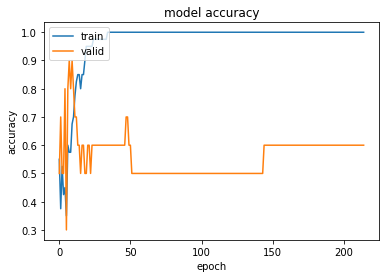

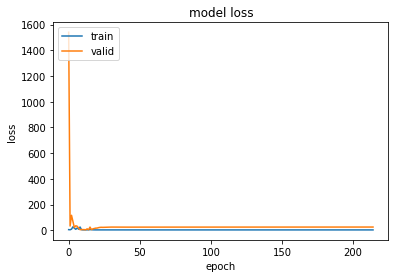

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 1, 600, 63)]      0         
                                                                 
 conv2d_32 (Conv2D)          (None, 1, 600, 63)        254079    
                                                                 
 batch_normalization_32 (Bat  (None, 1, 600, 63)       252       
 chNormalization)                                                
                                                                 
 average_pooling2d_32 (Avera  (None, 1, 100, 63)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_33 (Conv2D)          (None, 1, 100, 10)        20170     
                                                                 
 batch_normalization_33 (Bat  (None, 1, 100, 10)       40  

1/1 [==============================] - 1s 562ms/step - loss: 8.3060 - decoder_loss: 25.9992 - encoder_loss: 5.6282 - classifier_loss: 0.7787 - decoder_accuracy: 0.0323 - encoder_accuracy: 0.0000e+00 - classifier_accuracy: 0.5667
F1-score is computed based on binary
(loss: 8.305985450744629, accuracy: 0.5666666626930237)
              precision    recall  f1-score   support

         0.0       0.57      0.53      0.55        15
         1.0       0.56      0.60      0.58        15

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.57        30
weighted avg       0.57      0.57      0.57        30

Accuracy: 0.5666666626930237


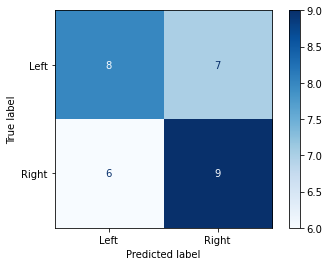

Accuracy: 0.5666666626930237
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1]


In [ ]:
from min2net.utils import DataLoader

loader = DataLoader(dataset='SMR_BCI', 
                    train_type='subject_dependent', 
                    subject=10, 
                    data_format='NTCD', # for MIN2Net
                    data_type='time_domain', 
                    dataset_path='datasets')

from tensorflow.keras.layers import Concatenate, AveragePooling2D, BatchNormalization, Conv2D, Conv2DTranspose, Dense, Input, Reshape, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, Nadam
import tensorflow as tf
from tensorflow.keras import backend as K
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import os
import time
from sklearn.metrics import classification_report, f1_score
from min2net.loss import mean_squared_error, triplet_loss, SparseCategoricalCrossentropy
from min2net.utils import TimeHistory, compute_class_weight

class MIN2Net:
    def __init__(self,
                input_shape=(1,400,20), 
                num_class=2, 
                loss=[mean_squared_error, triplet_loss(margin=1.0), 'sparse_categorical_crossentropy'],  #
                loss_weights=[0.1, 1, 0.1], 
                latent_dim = None,
                epochs=1000,
                batch_size=100,
                optimizer=Nadam(beta_1=0.9, beta_2=0.999, epsilon=1e-07),
                lr=1e-2,
                min_lr=1e-4,
                factor=0.5,
                patience=5, 
                es_patience=200,
                verbose=1,
                log_path='logs',
                model_name='MIN2Net', 
                **kwargs):
        D, T, C = input_shape
        self.latent_dim = latent_dim if latent_dim is not None else C if num_class==2 else 64
        self.num_class = num_class
        self.input_shape = input_shape
        self.loss = loss
        self.loss_weights = loss_weights
        self.epochs = epochs
        self.batch_size = batch_size
        self.optimizer = optimizer
        self.optimizer.lr = lr
        self.lr = lr
        self.min_lr = min_lr
        self.factor = factor
        self.patience = patience
        self.es_patience = es_patience
        self.verbose = verbose
        self.log_path = log_path
        self.model_name = model_name
        self.weights_dir = log_path+'/'+model_name+'_out_weights.h5'
        self.csv_dir = log_path+'/'+model_name+'_out_log.log'
        self.time_log = log_path+'/'+model_name+'_time_log.csv'

        # use **kwargs to set the new value of below args.
        self.f1_average = 'binary' if self.num_class == 2 else 'macro'
        self.data_format = 'channels_last'
        self.shuffle = False
        self.metrics = 'accuracy'
        self.monitor = 'val_loss'
        self.mode = 'min'
        self.save_best_only = True
        self.save_weight_only = True
        self.seed = 1234
        self.class_balancing = False
        # 'set params'
        self.subsampling_size = 100
        self.pool_size_1 = (1,T//self.subsampling_size)
        self.pool_size_2 = (1,4)
        self.filter_1 = C
        self.filter_2 = 10
        
        for k in kwargs.keys():
            self.__setattr__(k, kwargs[k])
        
        self.flatten_size = T//self.pool_size_1[1]//self.pool_size_2[1]
        
        np.random.seed(self.seed)
        tf.random.set_seed(self.seed)
        K.set_image_data_format(self.data_format)
        if not os.path.exists(self.log_path):
            os.makedirs(self.log_path)

    def build(self):
        'encoder'
        encoder_input  = Input(self.input_shape)
        en_conv        = Conv2D(self.filter_1, (1, 64), activation='elu', padding="same", 
                                kernel_constraint=max_norm(2., axis=(0, 1, 2)))(encoder_input)
        en_conv        = BatchNormalization(axis=3, epsilon=1e-05, momentum=0.1)(en_conv)
        en_conv        = AveragePooling2D(pool_size=self.pool_size_1)(en_conv)  
        en_conv        = Conv2D(self.filter_2, (1, 32), activation='elu', padding="same", 
                                kernel_constraint=max_norm(2., axis=(0, 1, 2)))(en_conv)
        en_conv        = BatchNormalization(axis=3, epsilon=1e-05, momentum=0.1)(en_conv)
        en_conv        = AveragePooling2D(pool_size=self.pool_size_2)(en_conv)
        en_conv        = Flatten()(en_conv)
        encoder_output = Dense(self.latent_dim, kernel_constraint=max_norm(0.5))(en_conv)
        encoder        = Model(inputs=encoder_input, outputs=encoder_output, name='encoder')
        encoder.summary()
        
        'decoder'
        decoder_input  = Input(shape=(self.latent_dim,), name='decoder_input')
        de_conv        = Dense(1*self.flatten_size*self.filter_2, activation='elu', 
                               kernel_constraint=max_norm(0.5))(decoder_input)
        de_conv        = Reshape((1, self.flatten_size, self.filter_2))(de_conv)
        de_conv        = Conv2DTranspose(filters=self.filter_2, kernel_size=(1, 64), 
                                         activation='elu', padding='same', strides=self.pool_size_2, 
                                         kernel_constraint=max_norm(2., axis=(0, 1, 2)))(de_conv)
        decoder_output = Conv2DTranspose(filters=self.filter_1, kernel_size=(1, 32), 
                                         activation='elu', padding='same', strides=self.pool_size_1, 
                                         kernel_constraint=max_norm(2., axis=(0, 1, 2)))(de_conv)
        decoder        = Model(inputs=decoder_input, outputs=decoder_output, name='decoder')
        decoder.summary()

        'Build the computation graph for training'
        latent         = encoder(encoder_input)
        train_xr       = decoder(latent)
        z              = Dense(self.num_class, activation='softmax', kernel_constraint=max_norm(0.5), 
                               name='classifier')(latent)

        return Model(inputs=encoder_input, outputs=[train_xr, latent, z], 
                            name='MIN2Net')
    
    def fit(self, X_train, y_train, X_val, y_val):
            
        if X_train.ndim != 4:
            raise Exception('ValueError: `X_train` is incompatible: expected ndim=4, found ndim='+str(X_train.ndim))
        elif X_val.ndim != 4:
            raise Exception('ValueError: `X_val` is incompatible: expected ndim=4, found ndim='+str(X_val.ndim))

        csv_logger    = CSVLogger(self.csv_dir)
        time_callback = TimeHistory(self.time_log)
        checkpointer  = ModelCheckpoint(monitor=self.monitor, filepath=self.weights_dir, 
                                        verbose=self.verbose, save_best_only=self.save_best_only, 
                                        save_weight_only=self.save_weight_only)
        reduce_lr     = ReduceLROnPlateau(monitor=self.monitor, patience=self.patience, 
                                          factor=self.factor, mode=self.mode, verbose=self.verbose, 
                                          min_lr=self.min_lr)
        es            = EarlyStopping(monitor=self.monitor, mode=self.mode, verbose=self.verbose, 
                                      patience=self.es_patience)
        model = self.build()     
        model.summary()
        
        if self.class_balancing: # compute_class_weight if class_balancing is True
            class_weight  = compute_class_weight(y_train)
            self.loss[-1] = SparseCategoricalCrossentropy(class_weight=class_weight)
        
        model.compile(optimizer=self.optimizer, loss=self.loss, metrics=self.metrics, loss_weights=self.loss_weights)

        history = model.fit(x=X_train, y=[X_train,y_train,y_train],
                          batch_size=self.batch_size, shuffle=self.shuffle,
                          epochs=self.epochs, validation_data=(X_val, [X_val,y_val,y_val]),
                          callbacks=[checkpointer,csv_logger,reduce_lr,es, time_callback])
        return history
    def predict(self, X_test, y_test):

        if X_test.ndim != 4:
            raise Exception('ValueError: `X_test` is incompatible: expected ndim=4, found ndim='+str(X_test.ndim))

        model = self.build()
        model.summary()
        model.load_weights(self.weights_dir)
        model.compile(optimizer=self.optimizer, loss=self.loss, metrics=self.metrics, loss_weights=self.loss_weights)

        start = time.time()
        y_pred_decoder, y_pred_trip, y_pred_clf = model.predict(X_test)
        end = time.time()
        loss, decoder_loss, trip_loss, classifier_loss, decoder_acc, trip_acc, classifier_acc  = model.evaluate(x=X_test,
                                                                                                                y=[X_test,y_test,y_test],
                                                                                                                batch_size=self.batch_size, 
                                                                                                                verbose=self.verbose)
        y_pred_argm = np.argmax(y_pred_clf, axis=1)
        print("F1-score is computed based on {}".format(self.f1_average))
        f1 = f1_score(y_test, y_pred_argm, average=self.f1_average)
        print('(loss: {}, accuracy: {})'.format(loss, classifier_acc))
        print(classification_report(y_test, y_pred_argm))
        evaluation = {'loss': loss, 
                      'decoder_loss': decoder_loss, 
                      'triplet_loss':trip_loss, 
                      'classifier_loss': classifier_loss, 
                      'accuracy': classifier_acc,
                      'f1-score': f1 ,
                      'prediction_time': end-start}
        Y = {'y_true': y_test,
             'y_pred': y_pred_argm,
             'y_pred_decoder': y_pred_decoder}
        cm = confusion_matrix(y_test, y_pred_argm)
        labels = ["Left", "Right"]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        return Y, evaluation, disp


import shutil
for k in range(5,6):
  # k=1
  X_train, y_train = loader.load_train_set(fold=k)
  X_val, y_val = loader.load_val_set(fold=k)
  X_test, y_test = loader.load_test_set(fold=k)

  # load dataset
  test_accuracy=[]

  log_path=str(k)
  print('log :', log_path)
  model = MIN2Net(input_shape=(1, 600, 63), num_class=2, monitor='val_loss')

  # model.fit(X_train, y_train, X_val, y_val)
  history=model.fit(X_train, y_train, X_val, y_val)
  print(history.history.keys())

  # summarize history for accuracy
  plt.plot(history.history['classifier_accuracy'])
  plt.plot(history.history['val_classifier_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()
  
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()

  Y, evaluation,disp = model.predict(X_test, y_test)
  Accuracy=evaluation.get('accuracy')
  # test_accuracy=[test_accuracy k]

  print('Accuracy:',Accuracy)

  disp.plot(cmap=plt.cm.Blues)
  plt.show()

  if os.path.exists('/content/logs'):
    shutil.rmtree('/content/logs')
  print('Accuracy:',evaluation.get('accuracy'))
  # Y = {'y_true': y_test,
  #              'y_pred': y_pred_argm,
  #              'y_pred_decoder': y_pred_decoder}
  y_true=Y.get('y_true')
  y_pred=Y.get('y_pred')
  print(y_true)
  print(y_pred)


In [ ]:
loader = DataLoader(dataset='SMR_BCI', 
                    train_type='subject_dependent', 
                    subject=1, 
                    data_format='NCTD', # for EEGNet and DeepConvNet (our paper and the original paper set data_format='NDCT')
                    data_type='time_domain', 
                    dataset_path='datasets')

In [ ]:
# load dataset
X_train, y_train = loader.load_train_set(fold=1)
X_val, y_val = loader.load_val_set(fold=1)
X_test, y_test = loader.load_test_set(fold=1)

from min2net.model import EEGNet
# (our paper and the original paper set input_shape=(1,20,400), data_format='channels_first')
model = EEGNet(input_shape=(20,400,1), num_class=2, dropout_rate=0.25, shuffle=True, data_format='channels_last')
model.fit(X_train, y_train, X_val, y_val)
Y, evaluation = model.predict(X_test, y_test)

In [ ]:
# load dataset
X_train, y_train = loader.load_train_set(fold=1)
X_val, y_val = loader.load_val_set(fold=1)
X_test, y_test = loader.load_test_set(fold=1)

from min2net.model import DeepConvNet
# (our paper and the original paper set input_shape=(1,20,400), data_format='channels_first')
model = DeepConvNet(input_shape=(20,400,1), num_class=2, dropout_rate=0.25, shuffle=True, data_format='channels_last')
model.fit(X_train, y_train, X_val, y_val)
Y, evaluation = model.predict(X_test, y_test)

In [ ]:
# this model requires spectral-spatial-mapping
# see https://min2net.github.io/docs/preprocessing/BCIC2a/#spectral-spatial-mapping

# generate fake data
import numpy as np
X_train = np.random.rand(100,20,28,28,1)
y_train = np.concatenate(([0]*50, [1]*50))
X_val = np.random.rand(40,20,28,28,1)
y_val = np.concatenate(([0]*20, [1]*20))
X_test = np.random.rand(40,20,28,28,1)
y_test = np.concatenate(([0]*20, [1]*20))

from min2net.model import SpectralSpatialCNN
model = SpectralSpatialCNN(input_shape=(28, 28, 1), num_class=2, epochs=10, dropout_rate=0.25, shuffle=True)
model.fit(X_train, y_train, X_val, y_val)
Y, evaluation = model.predict(X_test, y_test)